In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Processing 10000_events_simset_1800_seed_1000_upgrade_internal_20250516_224300.parquet...
Loaded 10000 events
Found 7601 CC events and 2399 NC events

Processing 10000_events_simset_1800_seed_1000_upgrade_internal_20250516_224300.parquet...
Loaded 10000 events
Found 7601 CC events and 2399 NC events

Processing 10000_events_simset_1810_seed_1010_upgrade_internal_20250516_224002.parquet...
Loaded 10000 events
Found 7487 CC events and 2513 NC events

Creating combined histograms...
Total CC events: 22689
Total NC events: 7311

Combined Statistics:
CC Events (22689 events):
  Mean hits: 45.67
  Median hits: 33.00
  Mean unique DOMs: 38.29
  Median unique DOMs: 29.00

NC Events (7311 events):
  Mean hits: 13.21
  Median hits: 7.00
  Mean unique DOMs: 11.30
  Median unique DOMs: 6.00


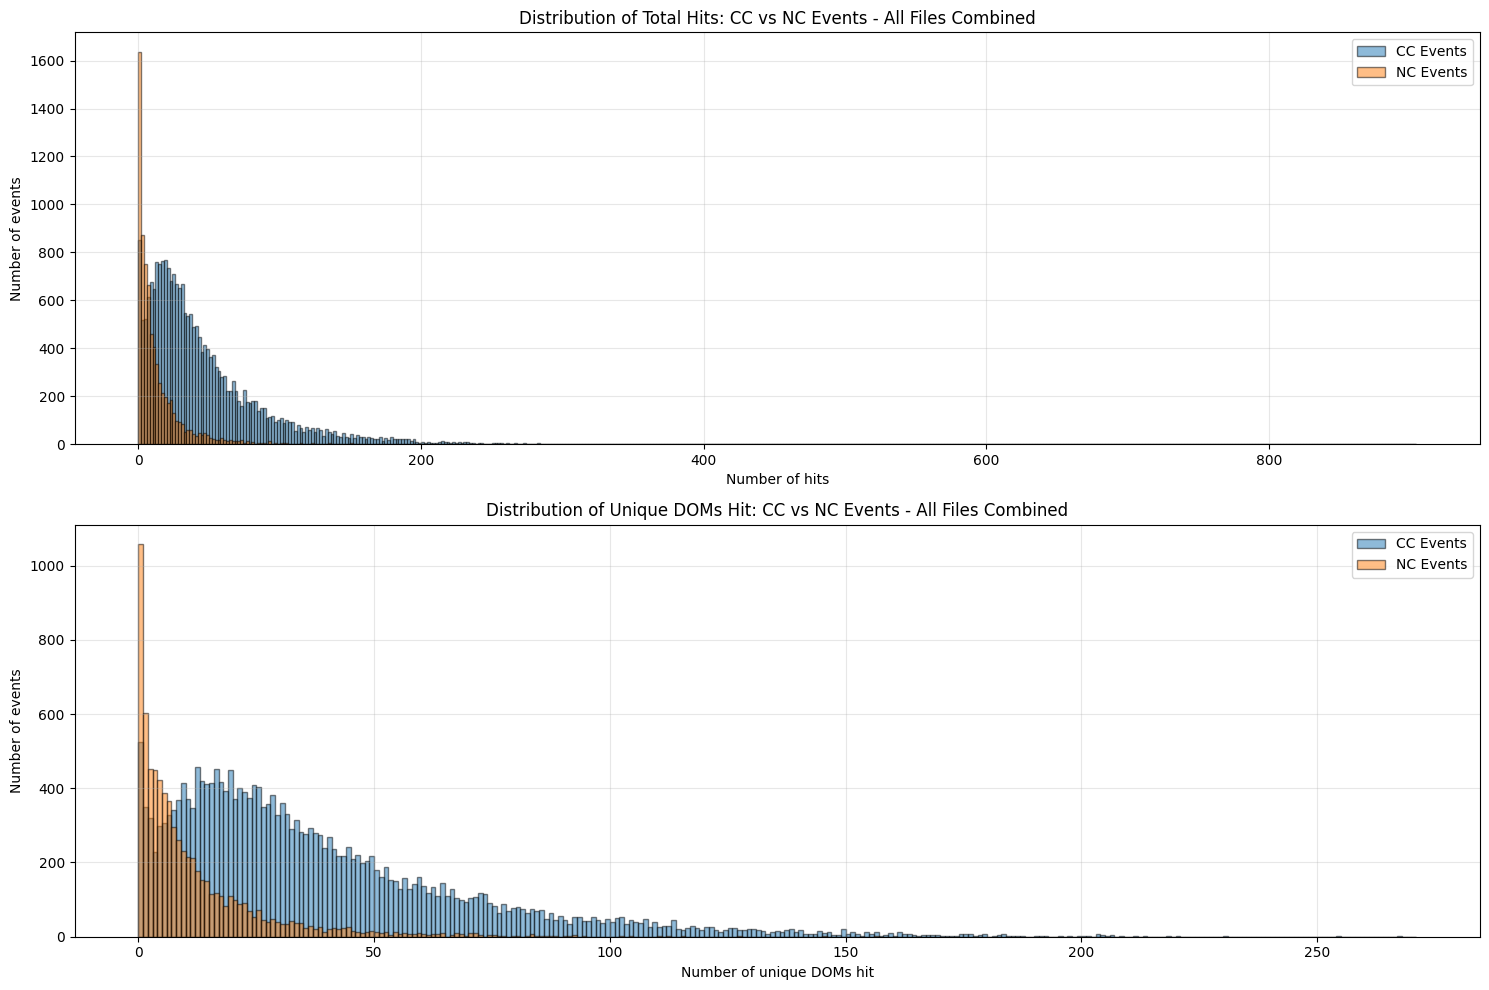

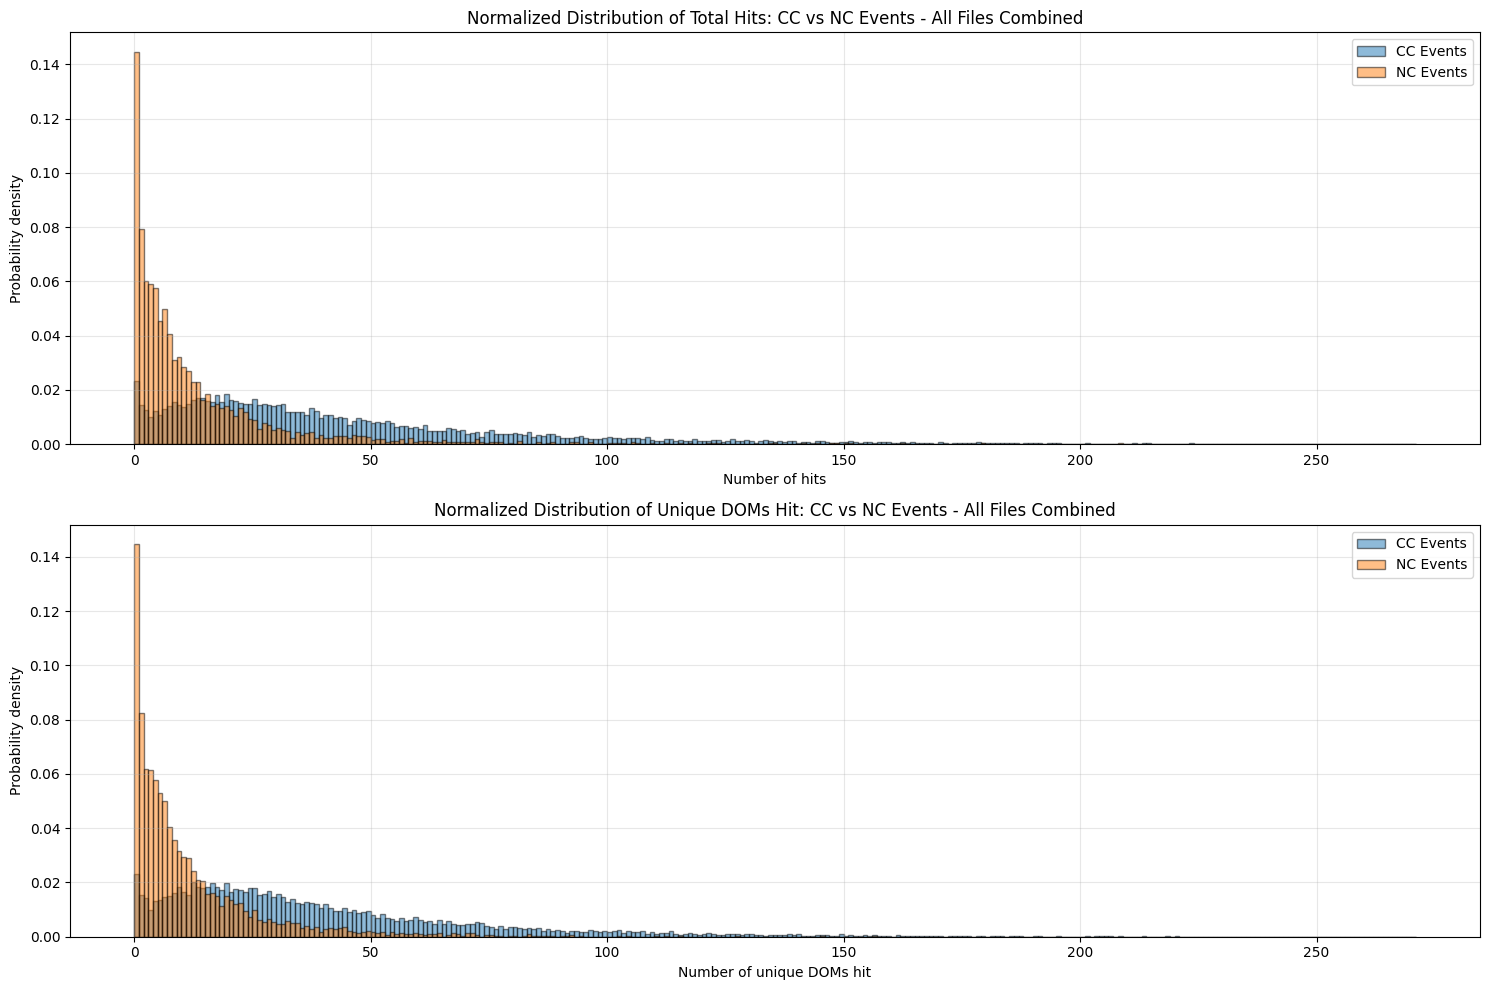

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Directory containing your files
data_dir = "output/"

# List of simulation output files
sim_files = [
    "10000_events_simset_1800_seed_1000_upgrade_internal_20250516_224300.parquet",
    "10000_events_simset_1800_seed_1000_upgrade_internal_20250516_224300.parquet",
    "10000_events_simset_1810_seed_1010_upgrade_internal_20250516_224002.parquet"
]

# Lists to collect data from all files
all_cc_hits = []
all_nc_hits = []
all_cc_unique_doms = []
all_nc_unique_doms = []

# Process each file
for sim_file in sim_files:
    file_path = os.path.join(data_dir, sim_file)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    
    print(f"\nProcessing {sim_file}...")
    
    # Load the file
    df = pd.read_parquet(file_path)
    print(f"Loaded {len(df)} events")
    
    # Get CC and NC events
    nc_idx = []
    cc_idx = []
    
    for i, (idx, row) in enumerate(df.iterrows()):
        if row['mc_truth']['interaction'] == 1:
            cc_idx.append(idx)
        else:
            nc_idx.append(idx)
    
    print(f"Found {len(cc_idx)} CC events and {len(nc_idx)} NC events")
    
    # Arrays to store total hit counts for CC and NC events
    cc_hits_per_event = np.zeros(len(cc_idx))
    nc_hits_per_event = np.zeros(len(nc_idx))
    
    # Arrays to store unique DOM hit counts
    cc_unique_doms_per_event = np.zeros(len(cc_idx))
    nc_unique_doms_per_event = np.zeros(len(nc_idx))
    
    # Process CC events
    for i, event_idx in enumerate(cc_idx):
        # Get photons data
        photons = df.iloc[event_idx]['photons']
        
        # Count total hits
        cc_hits_per_event[i] = len(photons['t'])
        
        # Count unique DOMs hit
        string_ids = photons['string_id']
        sensor_ids = photons['sensor_id']
        cc_unique_doms_per_event[i] = len(set(zip(string_ids, sensor_ids)))
    
    # Process NC events
    for i, event_idx in enumerate(nc_idx):
        # Get photons data
        photons = df.iloc[event_idx]['photons']
        
        # Count total hits
        nc_hits_per_event[i] = len(photons['t'])
        
        # Count unique DOMs hit
        string_ids = photons['string_id']
        sensor_ids = photons['sensor_id']
        nc_unique_doms_per_event[i] = len(set(zip(string_ids, sensor_ids)))
    
    # Add to combined lists
    all_cc_hits.extend(cc_hits_per_event)
    all_nc_hits.extend(nc_hits_per_event)
    all_cc_unique_doms.extend(cc_unique_doms_per_event)
    all_nc_unique_doms.extend(nc_unique_doms_per_event)

# Convert to numpy arrays
all_cc_hits = np.array(all_cc_hits)
all_nc_hits = np.array(all_nc_hits)
all_cc_unique_doms = np.array(all_cc_unique_doms)
all_nc_unique_doms = np.array(all_nc_unique_doms)

print("\nCreating combined histograms...")
print(f"Total CC events: {len(all_cc_hits)}")
print(f"Total NC events: {len(all_nc_hits)}")

# Create histograms for combined data
plt.figure(figsize=(15, 10))

# Plot 1: Total hits distribution
plt.subplot(2, 1, 1)
max_hits = max(np.max(all_cc_hits), np.max(all_nc_hits))
bins = np.arange(0, max_hits + 10, 2)  # Adjust bin size as needed

plt.hist(all_cc_hits, bins=bins, alpha=0.5, label='CC Events', edgecolor='black')
plt.hist(all_nc_hits, bins=bins, alpha=0.5, label='NC Events', edgecolor='black')
plt.xlabel('Number of hits')
plt.ylabel('Number of events')
plt.title('Distribution of Total Hits: CC vs NC Events - All Files Combined')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Unique DOMs hit distribution
plt.subplot(2, 1, 2)
max_doms = max(np.max(all_cc_unique_doms), np.max(all_nc_unique_doms))
bins = np.arange(0, max_doms + 5, 1)  # Adjust bin size as needed

plt.hist(all_cc_unique_doms, bins=bins, alpha=0.5, label='CC Events', edgecolor='black')
plt.hist(all_nc_unique_doms, bins=bins, alpha=0.5, label='NC Events', edgecolor='black')
plt.xlabel('Number of unique DOMs hit')
plt.ylabel('Number of events')
plt.title('Distribution of Unique DOMs Hit: CC vs NC Events - All Files Combined')
plt.legend()
plt.grid(alpha=0.3)

# Print combined statistics
print(f"\nCombined Statistics:")
print(f"CC Events ({len(all_cc_hits)} events):")
print(f"  Mean hits: {np.mean(all_cc_hits):.2f}")
print(f"  Median hits: {np.median(all_cc_hits):.2f}")
print(f"  Mean unique DOMs: {np.mean(all_cc_unique_doms):.2f}")
print(f"  Median unique DOMs: {np.median(all_cc_unique_doms):.2f}")

print(f"\nNC Events ({len(all_nc_hits)} events):")
print(f"  Mean hits: {np.mean(all_nc_hits):.2f}")
print(f"  Median hits: {np.median(all_nc_hits):.2f}")
print(f"  Mean unique DOMs: {np.mean(all_nc_unique_doms):.2f}")
print(f"  Median unique DOMs: {np.median(all_nc_unique_doms):.2f}")

plt.tight_layout()
plt.show()

# Normalized histograms for combined data
plt.figure(figsize=(15, 10))

# Plot 1: Normalized total hits distribution
plt.subplot(2, 1, 1)
plt.hist(all_cc_hits, bins=bins, alpha=0.5, label='CC Events', 
         edgecolor='black', density=True)
plt.hist(all_nc_hits, bins=bins, alpha=0.5, label='NC Events', 
         edgecolor='black', density=True)
plt.xlabel('Number of hits')
plt.ylabel('Probability density')
plt.title('Normalized Distribution of Total Hits: CC vs NC Events - All Files Combined')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Normalized unique DOMs hit distribution
plt.subplot(2, 1, 2)
plt.hist(all_cc_unique_doms, bins=bins, alpha=0.5, label='CC Events', 
         edgecolor='black', density=True)
plt.hist(all_nc_unique_doms, bins=bins, alpha=0.5, label='NC Events', 
         edgecolor='black', density=True)
plt.xlabel('Number of unique DOMs hit')
plt.ylabel('Probability density')
plt.title('Normalized Distribution of Unique DOMs Hit: CC vs NC Events - All Files Combined')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Processing 10000_events_simset_1800_seed_1000_upgrade_internal_20250516_224300.parquet...
Loaded 10000 events
Processing event 0/10000...
Processing event 1000/10000...
Processing event 2000/10000...
Processing event 3000/10000...
Processing event 4000/10000...
Processing event 5000/10000...
Processing event 6000/10000...
Processing event 7000/10000...
Processing event 8000/10000...
Processing event 9000/10000...
Extracted features for 9489 events
Class balance: 7422 CC events (78.2%), 2067 NC events (21.8%)
Training set: 6642 events, Test set: 2847 events
Training BDT classifier...

Model Evaluation:
Accuracy: 0.8135
Precision: 0.8525
Recall: 0.9210
F1 Score: 0.8854


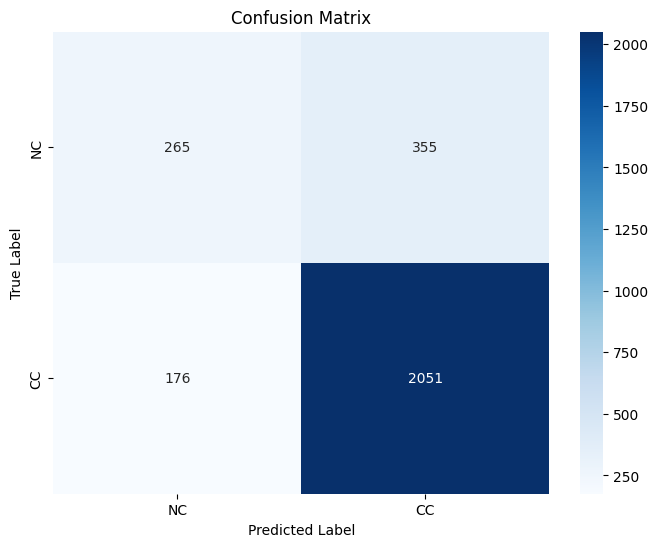

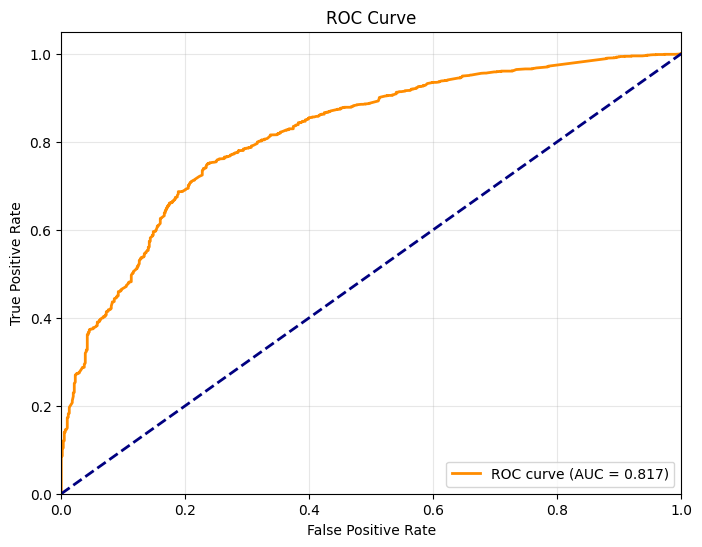

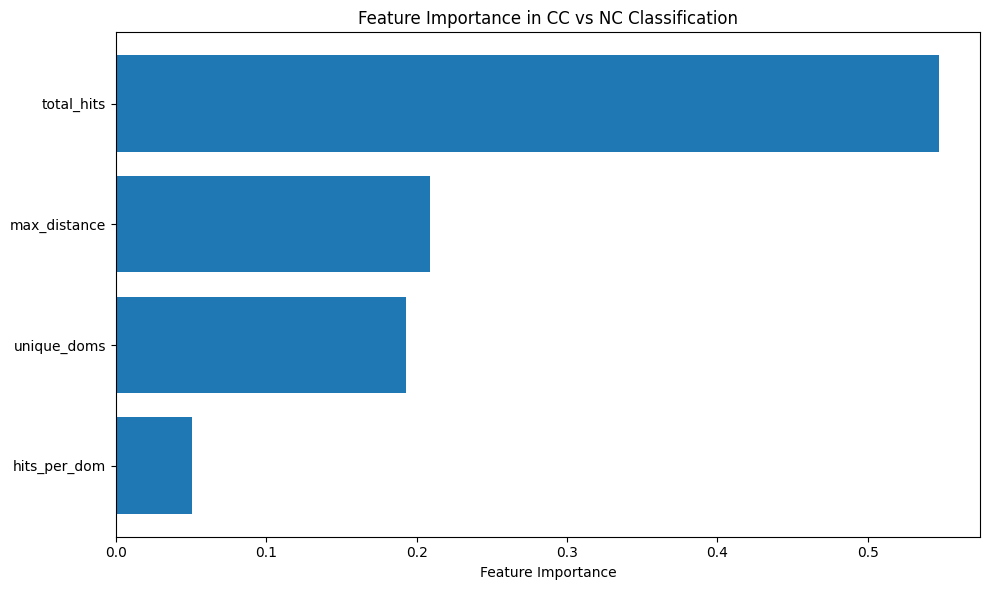

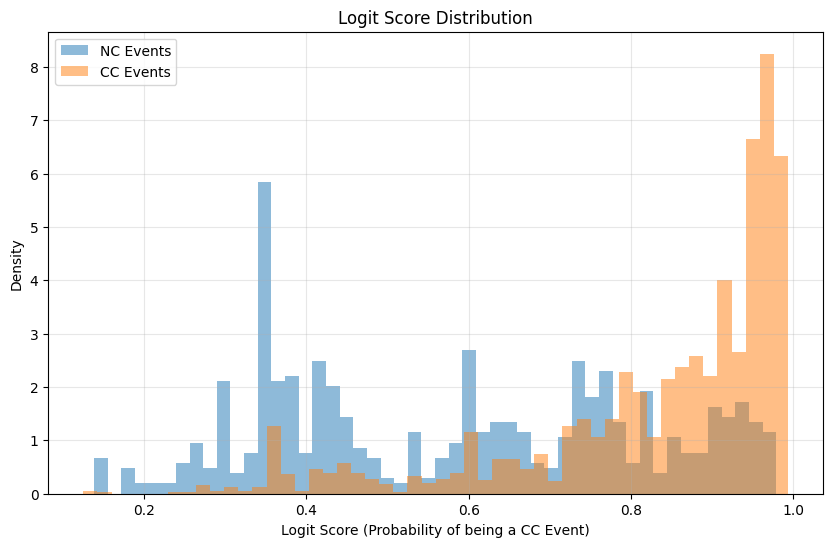


Optimal classification threshold: 0.7789
At this threshold - True Positive Rate: 0.7494, False Positive Rate: 0.2355
Precision at optimal threshold: 0.9196


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_curve, auc, confusion_matrix)
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Directory containing your files
data_dir = "output/"

# Just use one file to start
sim_file = "10000_events_simset_1800_seed_1000_upgrade_internal_20250516_224300.parquet"
file_path = os.path.join(data_dir, sim_file)

print(f"Processing {sim_file}...")

# Load the file
df = pd.read_parquet(file_path)
print(f"Loaded {len(df)} events")

# Function to extract event-level features
def extract_event_features(event_data):
    try:
        # Get interaction type (1 for CC, 2 for NC)
        interaction_type = event_data['mc_truth']['interaction']
        
        # Label: 1 for CC, 0 for NC
        label = 1 if interaction_type == 1 else 0
        
        # Get photon data
        photons = event_data['photons']
        
        # Skip events with no hits
        if len(photons['t']) == 0:
            return None
        
        # Basic features
        total_hits = len(photons['t'])
        string_ids = photons['string_id']
        sensor_ids = photons['sensor_id']
        unique_doms = len(set(zip(string_ids, sensor_ids)))
        
        # Calculate maximum distance between any two hit DOMs
        pos_x = photons['sensor_pos_x']
        pos_y = photons['sensor_pos_y']
        pos_z = photons['sensor_pos_z']
        positions = np.vstack((pos_x, pos_y, pos_z)).T
        max_distance = 0
        if len(positions) > 1:
            from scipy.spatial.distance import pdist
            max_distance = np.max(pdist(positions))
        
        # Simplified feature set
        features = {
            'total_hits': total_hits,
            'unique_doms': unique_doms,
            'max_distance': max_distance,
            'hits_per_dom': total_hits / max(1, unique_doms),
            'label': label
        }
        
        return features
    except Exception as e:
        print(f"Error extracting features: {e}")
        return None

# Extract features from all events
event_features = []
for i, (idx, event_data) in enumerate(df.iterrows()):
    if i % 1000 == 0:  # Progress update
        print(f"Processing event {i}/{len(df)}...")
    
    features = extract_event_features(event_data)
    if features is not None:
        event_features.append(features)

print(f"Extracted features for {len(event_features)} events")

# Convert to DataFrame
features_df = pd.DataFrame(event_features)

# Check class balance
cc_count = sum(features_df['label'] == 1)
nc_count = sum(features_df['label'] == 0)
print(f"Class balance: {cc_count} CC events ({cc_count/len(features_df)*100:.1f}%), {nc_count} NC events ({nc_count/len(features_df)*100:.1f}%)")

# Prepare features and target for BDT
X = features_df.drop('label', axis=1)
y = features_df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set: {X_train.shape[0]} events, Test set: {X_test.shape[0]} events")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the BDT
print("Training BDT classifier...")
bdt = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

bdt.fit(X_train_scaled, y_train)

# Make predictions
y_pred = bdt.predict(X_test_scaled)
y_prob = bdt.predict_proba(X_test_scaled)[:, 1]  # Probability of being CC

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['NC', 'CC'], yticklabels=['NC', 'CC'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
feature_importance = bdt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in CC vs NC Classification')
plt.tight_layout()
plt.show()

# Logit score distribution
plt.figure(figsize=(10, 6))
plt.hist(y_prob[y_test == 0], bins=50, alpha=0.5, label='NC Events', density=True)
plt.hist(y_prob[y_test == 1], bins=50, alpha=0.5, label='CC Events', density=True)
plt.xlabel('Logit Score (Probability of being a CC Event)')
plt.ylabel('Density')
plt.title('Logit Score Distribution')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Find optimal threshold - fixed issue
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal classification threshold: {optimal_threshold:.4f}")
print(f"At this threshold - True Positive Rate: {tpr[optimal_idx]:.4f}, False Positive Rate: {fpr[optimal_idx]:.4f}")

# Calculate precision at threshold properly
# The error was in trying to apply thresholds to y_prob
precision_at_threshold = precision_score(y_test, y_prob >= optimal_threshold)
print(f"Precision at optimal threshold: {precision_at_threshold:.4f}")

In [7]:
tenk_no_agg_deepcore = pd.read_parquet("output/10000_events_simset_1800_seed_1000_upgrade_internal_20250516_224300.parquet")


In [8]:
# First, get CC and NC events
nc_idx = []
cc_idx = []
for i in range(10000):
    if tenk_no_agg_deepcore['mc_truth'][i]['interaction'] == 1:
        cc_idx.append(i)
    else:
        nc_idx.append(i)

# Now add a 'particle_type' field to the photons structure
for i in range(10000):
    # Get the id_idx for all photons in this event
    id_idx_array = tenk_no_agg_deepcore['photons'][i]['id_idx']
    
    # Get the final_state_type array for this event
    final_state_types = tenk_no_agg_deepcore['mc_truth'][i]['final_state_type']
    
    # Create new array to store the particle types
    # Using the id_idx (with -1 adjustment) to map to final_state_type
    particle_types = np.array([final_state_types[idx-1] for idx in id_idx_array])
    
    # Add this as a new field to the photons structure
    tenk_no_agg_deepcore['photons'][i]['particle_type'] = particle_types

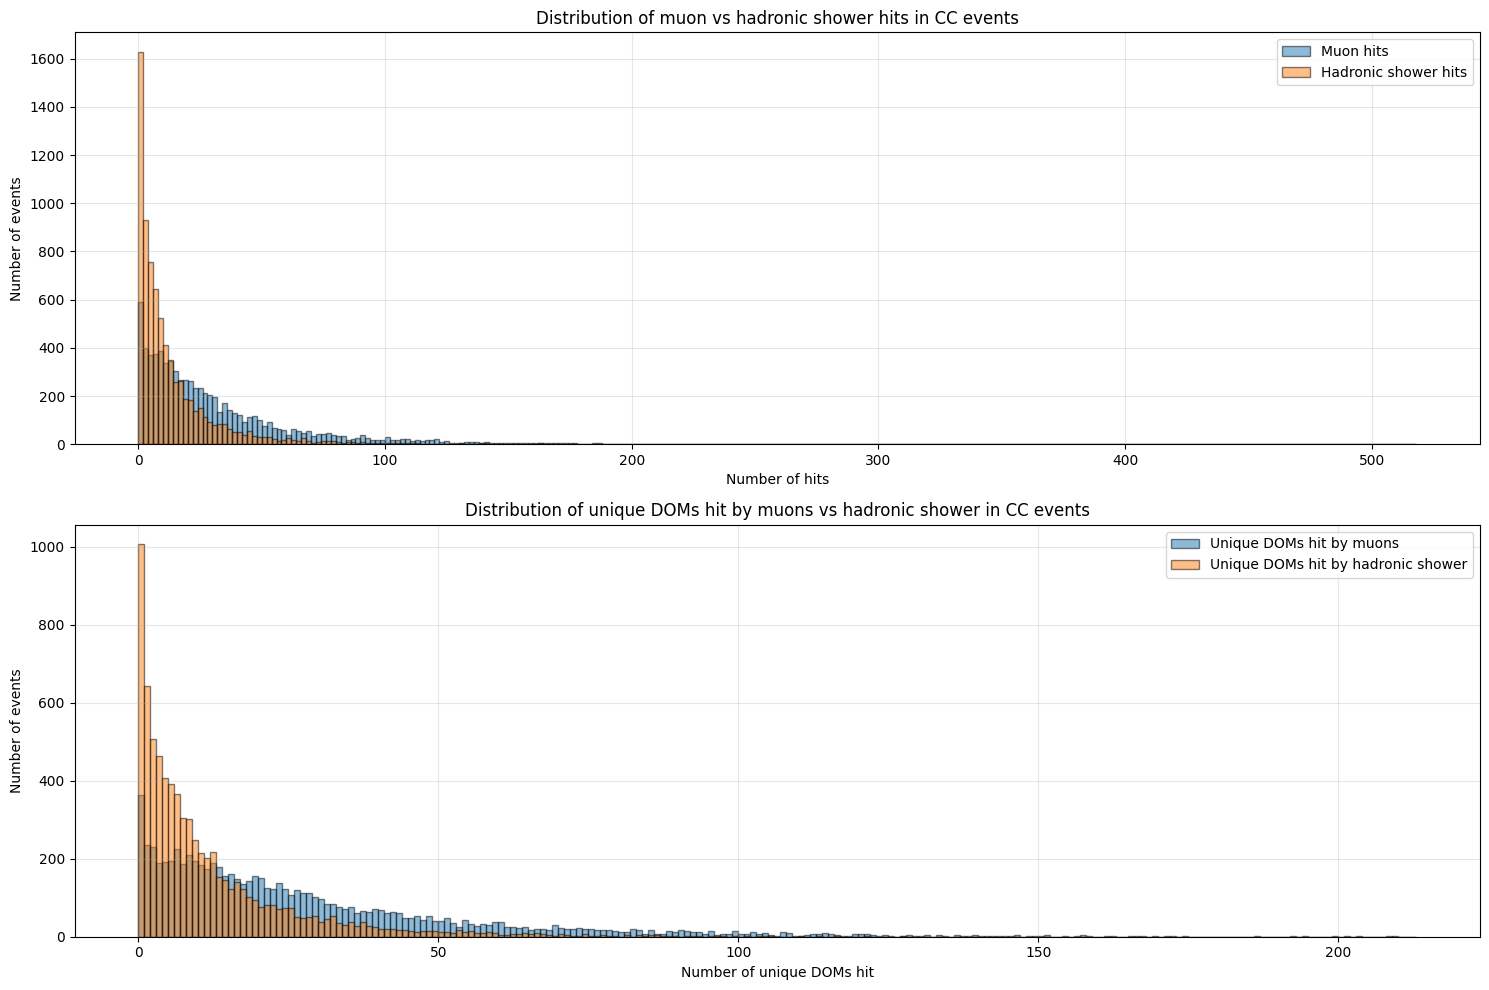

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Arrays to store hit counts
muon_hits_per_event = np.zeros(len(cc_idx))
hadron_hits_per_event = np.zeros(len(cc_idx))

# Arrays to store unique DOM hit counts
unique_muon_doms_per_event = np.zeros(len(cc_idx))
unique_hadron_doms_per_event = np.zeros(len(cc_idx))

# Process each CC event
for i, event_idx in enumerate(cc_idx):
    # Get particle types for all hits in this event
    particle_types = tenk_no_agg_deepcore['photons'][event_idx]['particle_type']
    
    # Identify muon hits and hadronic shower hits
    muon_mask = (particle_types == 13)
    hadron_mask = (particle_types != 13)
    
    # Count total hits
    muon_hits_per_event[i] = np.sum(muon_mask)
    hadron_hits_per_event[i] = np.sum(hadron_mask)
    
    # For unique DOM counts, we need string_id and sensor_id
    string_ids = tenk_no_agg_deepcore['photons'][event_idx]['string_id']
    sensor_ids = tenk_no_agg_deepcore['photons'][event_idx]['sensor_id']
    
    # Get unique DOMs hit by muons
    if np.any(muon_mask):
        muon_strings = string_ids[muon_mask]
        muon_sensors = sensor_ids[muon_mask]
        unique_muon_doms_per_event[i] = len(set(zip(muon_strings, muon_sensors)))
    
    # Get unique DOMs hit by hadronic shower
    if np.any(hadron_mask):
        hadron_strings = string_ids[hadron_mask]
        hadron_sensors = sensor_ids[hadron_mask]
        unique_hadron_doms_per_event[i] = len(set(zip(hadron_strings, hadron_sensors)))

# Create histograms
plt.figure(figsize=(15, 10))

# Plot 1: Total hits distribution
plt.subplot(2, 1, 1)
bins = np.arange(0, max(np.max(muon_hits_per_event), np.max(hadron_hits_per_event)) + 10, 2)
plt.hist(muon_hits_per_event, bins=bins, alpha=0.5, label='Muon hits', edgecolor='black')
plt.hist(hadron_hits_per_event, bins=bins, alpha=0.5, label='Hadronic shower hits', edgecolor='black')
plt.xlabel('Number of hits')
plt.ylabel('Number of events')
plt.title('Distribution of muon vs hadronic shower hits in CC events')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Unique DOMs hit distribution
plt.subplot(2, 1, 2)
bins = np.arange(0, max(np.max(unique_muon_doms_per_event), np.max(unique_hadron_doms_per_event)) + 5, 1)
plt.hist(unique_muon_doms_per_event, bins=bins, alpha=0.5, label='Unique DOMs hit by muons', edgecolor='black')
plt.hist(unique_hadron_doms_per_event, bins=bins, alpha=0.5, label='Unique DOMs hit by hadronic shower', edgecolor='black')
plt.xlabel('Number of unique DOMs hit')
plt.ylabel('Number of events')
plt.title('Distribution of unique DOMs hit by muons vs hadronic shower in CC events')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

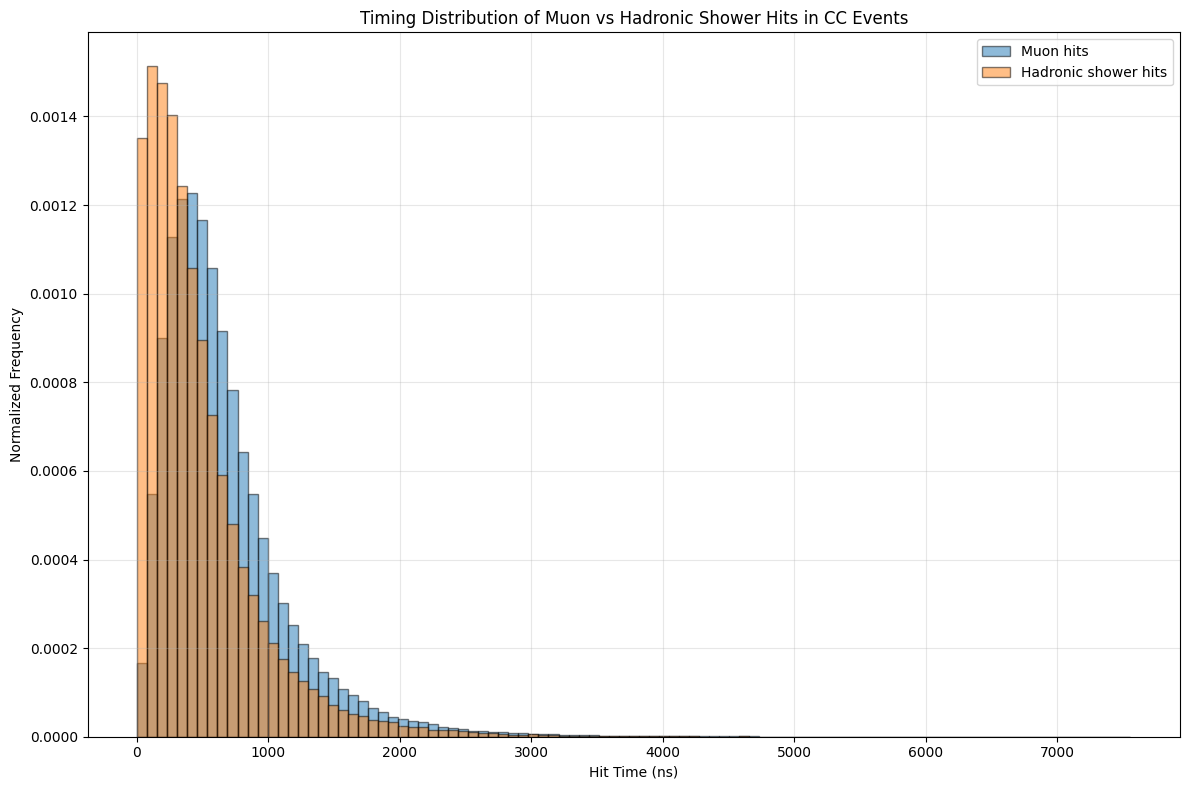

Muon hits statistics:
  Count: 239849
  Mean time: 671.22 ns
  Median time: 551.41 ns
  Min time: 3.32 ns
  Max time: 6895.47 ns

Hadronic shower hits statistics:
  Count: 104603
  Mean time: 482.73 ns
  Median time: 356.26 ns
  Min time: 3.30 ns
  Max time: 7556.97 ns


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Arrays to collect all hit times
all_muon_hit_times = []
all_hadron_hit_times = []

# Process each CC event
for event_idx in cc_idx:
    # Get particle types and times for all hits in this event
    particle_types = tenk_no_agg_deepcore['photons'][event_idx]['particle_type']
    hit_times = tenk_no_agg_deepcore['photons'][event_idx]['t']
    
    # Identify muon hits and hadronic shower hits
    muon_mask = (particle_types == 13)
    hadron_mask = (particle_types != 13)
    
    # Collect hit times
    muon_times = hit_times[muon_mask]
    hadron_times = hit_times[hadron_mask]
    
    # Append to our collection arrays
    all_muon_hit_times.extend(muon_times)
    all_hadron_hit_times.extend(hadron_times)

# Convert to numpy arrays for histogram plotting
all_muon_hit_times = np.array(all_muon_hit_times)
all_hadron_hit_times = np.array(all_hadron_hit_times)

# Create the timing histogram
plt.figure(figsize=(12, 8))

# Determine bin range covering both distributions
min_time = min(np.min(all_muon_hit_times) if len(all_muon_hit_times) > 0 else 0, 
               np.min(all_hadron_hit_times) if len(all_hadron_hit_times) > 0 else 0)
max_time = max(np.max(all_muon_hit_times) if len(all_muon_hit_times) > 0 else 3000, 
               np.max(all_hadron_hit_times) if len(all_hadron_hit_times) > 0 else 3000)

# Create logarithmically spaced bins for better visualization
# This works well for timing data that often spans multiple orders of magnitude
bins = np.linspace(min_time, max_time, 100)  # Linear bins
# Alternative: bins = np.logspace(np.log10(max(1, min_time)), np.log10(max_time), 100)  # Log bins

# Plot histograms
plt.hist(all_muon_hit_times, bins=bins, alpha=0.5, label='Muon hits', edgecolor='black', density=True)
plt.hist(all_hadron_hit_times, bins=bins, alpha=0.5, label='Hadronic shower hits', edgecolor='black', density=True)

plt.xlabel('Hit Time (ns)')
plt.ylabel('Normalized Frequency')
plt.title('Timing Distribution of Muon vs Hadronic Shower Hits in CC Events')
plt.legend()
plt.grid(alpha=0.3)

# Optional: Add a log scale on y-axis to see details in the tails
# plt.yscale('log')

plt.tight_layout()
plt.show()

# Print some statistics about the timing distributions
print(f"Muon hits statistics:")
print(f"  Count: {len(all_muon_hit_times)}")
print(f"  Mean time: {np.mean(all_muon_hit_times):.2f} ns")
print(f"  Median time: {np.median(all_muon_hit_times):.2f} ns")
print(f"  Min time: {np.min(all_muon_hit_times):.2f} ns")
print(f"  Max time: {np.max(all_muon_hit_times):.2f} ns")

print(f"\nHadronic shower hits statistics:")
print(f"  Count: {len(all_hadron_hit_times)}")
print(f"  Mean time: {np.mean(all_hadron_hit_times):.2f} ns")
print(f"  Median time: {np.median(all_hadron_hit_times):.2f} ns")
print(f"  Min time: {np.min(all_hadron_hit_times):.2f} ns")
print(f"  Max time: {np.max(all_hadron_hit_times):.2f} ns")

CC Events (7601 events):
  Mean hits: 45.32
  Median hits: 33.00
  Mean unique DOMs: 38.00
  Median unique DOMs: 29.00

NC Events (2399 events):
  Mean hits: 13.54
  Median hits: 7.00
  Mean unique DOMs: 11.48
  Median unique DOMs: 6.00


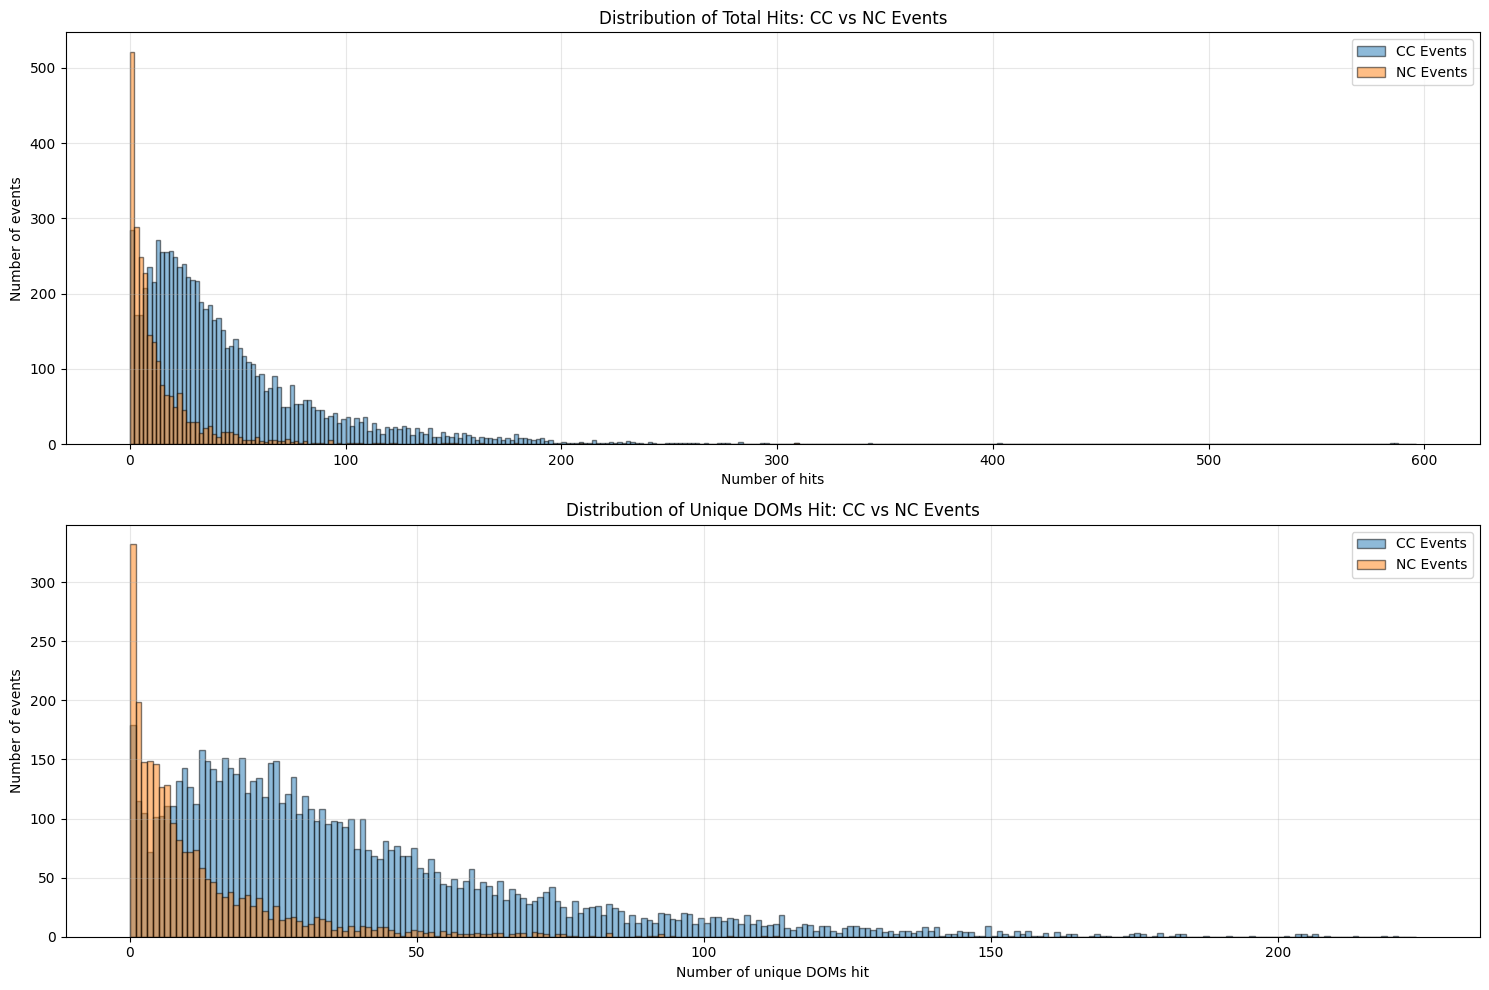

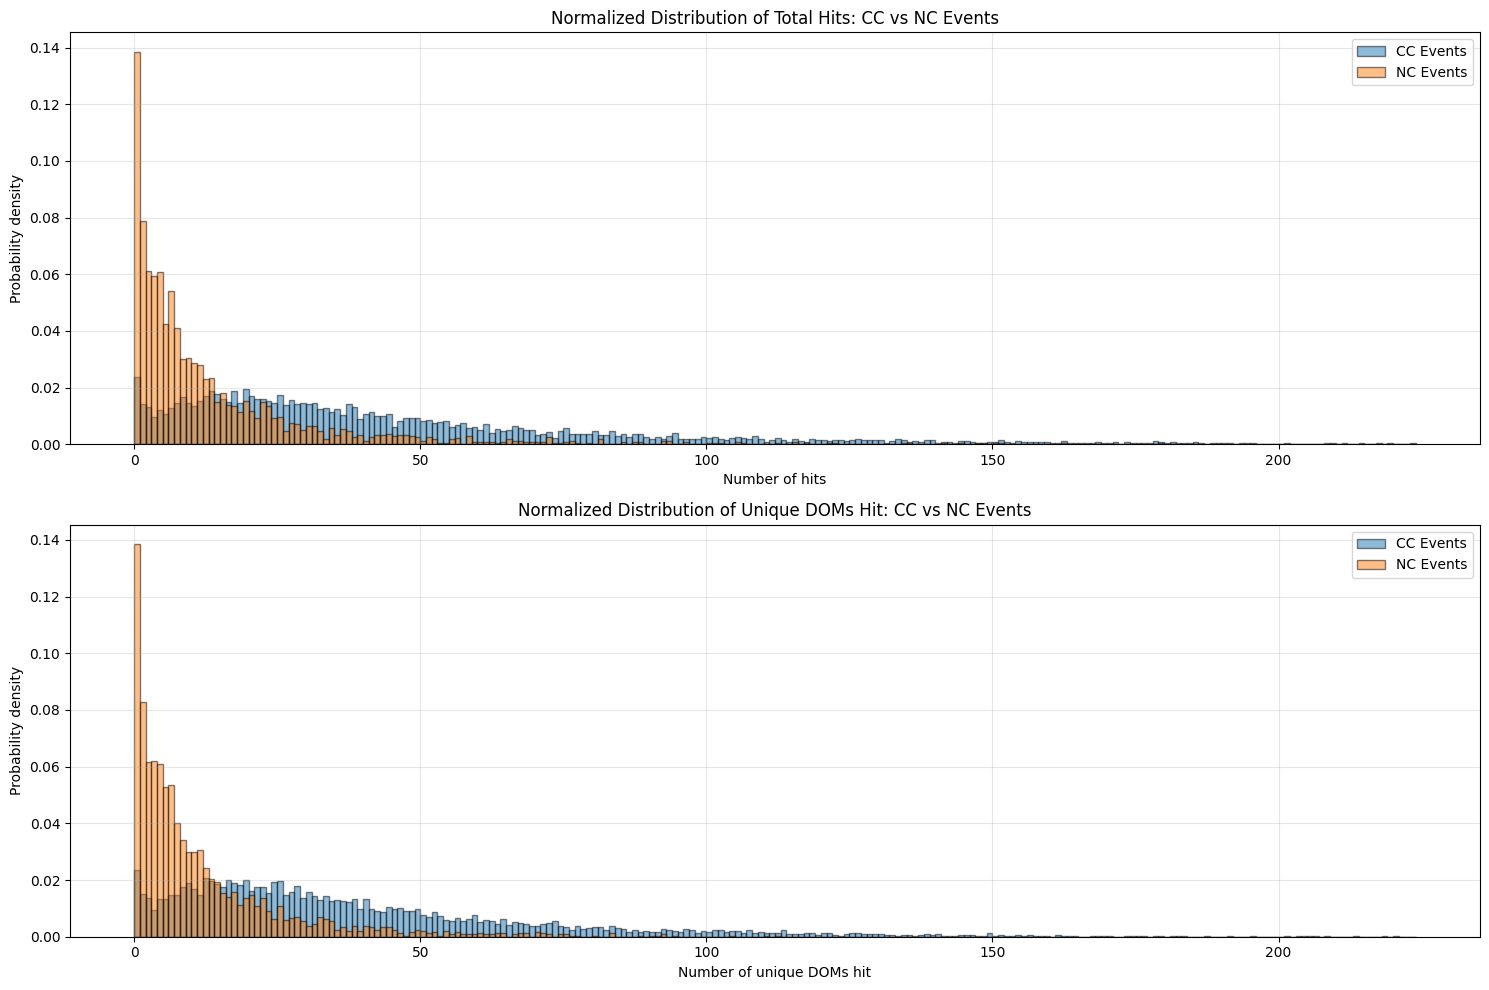

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Arrays to store total hit counts for CC and NC events
cc_hits_per_event = np.zeros(len(cc_idx))
nc_hits_per_event = np.zeros(len(nc_idx))

# Arrays to store unique DOM hit counts
cc_unique_doms_per_event = np.zeros(len(cc_idx))
nc_unique_doms_per_event = np.zeros(len(nc_idx))

# Process CC events
for i, event_idx in enumerate(cc_idx):
    # Count total hits
    cc_hits_per_event[i] = len(tenk_no_agg_deepcore['photons'][event_idx]['t'])
    
    # Count unique DOMs hit
    string_ids = tenk_no_agg_deepcore['photons'][event_idx]['string_id']
    sensor_ids = tenk_no_agg_deepcore['photons'][event_idx]['sensor_id']
    cc_unique_doms_per_event[i] = len(set(zip(string_ids, sensor_ids)))

# Process NC events
for i, event_idx in enumerate(nc_idx):
    # Count total hits
    nc_hits_per_event[i] = len(tenk_no_agg_deepcore['photons'][event_idx]['t'])
    
    # Count unique DOMs hit
    string_ids = tenk_no_agg_deepcore['photons'][event_idx]['string_id']
    sensor_ids = tenk_no_agg_deepcore['photons'][event_idx]['sensor_id']
    nc_unique_doms_per_event[i] = len(set(zip(string_ids, sensor_ids)))

# Create histograms
plt.figure(figsize=(15, 10))

# Plot 1: Total hits distribution
plt.subplot(2, 1, 1)
max_hits = max(np.max(cc_hits_per_event), np.max(nc_hits_per_event))
bins = np.arange(0, max_hits + 10, 2)  # Adjust bin size as needed

plt.hist(cc_hits_per_event, bins=bins, alpha=0.5, label='CC Events', edgecolor='black')
plt.hist(nc_hits_per_event, bins=bins, alpha=0.5, label='NC Events', edgecolor='black')
plt.xlabel('Number of hits')
plt.ylabel('Number of events')
plt.title('Distribution of Total Hits: CC vs NC Events')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Unique DOMs hit distribution
plt.subplot(2, 1, 2)
max_doms = max(np.max(cc_unique_doms_per_event), np.max(nc_unique_doms_per_event))
bins = np.arange(0, max_doms + 5, 1)  # Adjust bin size as needed

plt.hist(cc_unique_doms_per_event, bins=bins, alpha=0.5, label='CC Events', edgecolor='black')
plt.hist(nc_unique_doms_per_event, bins=bins, alpha=0.5, label='NC Events', edgecolor='black')
plt.xlabel('Number of unique DOMs hit')
plt.ylabel('Number of events')
plt.title('Distribution of Unique DOMs Hit: CC vs NC Events')
plt.legend()
plt.grid(alpha=0.3)

# Print some statistics
print(f"CC Events ({len(cc_idx)} events):")
print(f"  Mean hits: {np.mean(cc_hits_per_event):.2f}")
print(f"  Median hits: {np.median(cc_hits_per_event):.2f}")
print(f"  Mean unique DOMs: {np.mean(cc_unique_doms_per_event):.2f}")
print(f"  Median unique DOMs: {np.median(cc_unique_doms_per_event):.2f}")

print(f"\nNC Events ({len(nc_idx)} events):")
print(f"  Mean hits: {np.mean(nc_hits_per_event):.2f}")
print(f"  Median hits: {np.median(nc_hits_per_event):.2f}")
print(f"  Mean unique DOMs: {np.mean(nc_unique_doms_per_event):.2f}")
print(f"  Median unique DOMs: {np.median(nc_unique_doms_per_event):.2f}")

plt.tight_layout()
plt.show()

# Optional: If you want to make the histograms normalized for better comparison 
# when there are different numbers of CC and NC events
plt.figure(figsize=(15, 10))

# Plot 1: Normalized total hits distribution
plt.subplot(2, 1, 1)
plt.hist(cc_hits_per_event, bins=bins, alpha=0.5, label='CC Events', 
         edgecolor='black', density=True)
plt.hist(nc_hits_per_event, bins=bins, alpha=0.5, label='NC Events', 
         edgecolor='black', density=True)
plt.xlabel('Number of hits')
plt.ylabel('Probability density')
plt.title('Normalized Distribution of Total Hits: CC vs NC Events')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Normalized unique DOMs hit distribution
plt.subplot(2, 1, 2)
plt.hist(cc_unique_doms_per_event, bins=bins, alpha=0.5, label='CC Events', 
         edgecolor='black', density=True)
plt.hist(nc_unique_doms_per_event, bins=bins, alpha=0.5, label='NC Events', 
         edgecolor='black', density=True)
plt.xlabel('Number of unique DOMs hit')
plt.ylabel('Probability density')
plt.title('Normalized Distribution of Unique DOMs Hit: CC vs NC Events')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Extracting features...
Feature matrix shape: (10000, 30)
Label vector shape: (10000,)
Number of CC events: 7601
Number of NC events: 2399
Training BDT classifier...

Model Evaluation:
Accuracy: 0.8263


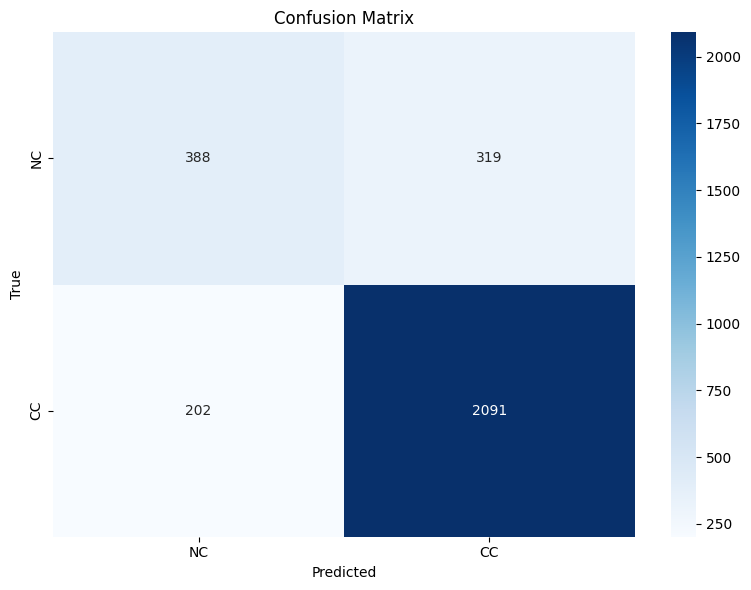


Classification Report:
              precision    recall  f1-score   support

          NC       0.66      0.55      0.60       707
          CC       0.87      0.91      0.89      2293

    accuracy                           0.83      3000
   macro avg       0.76      0.73      0.74      3000
weighted avg       0.82      0.83      0.82      3000



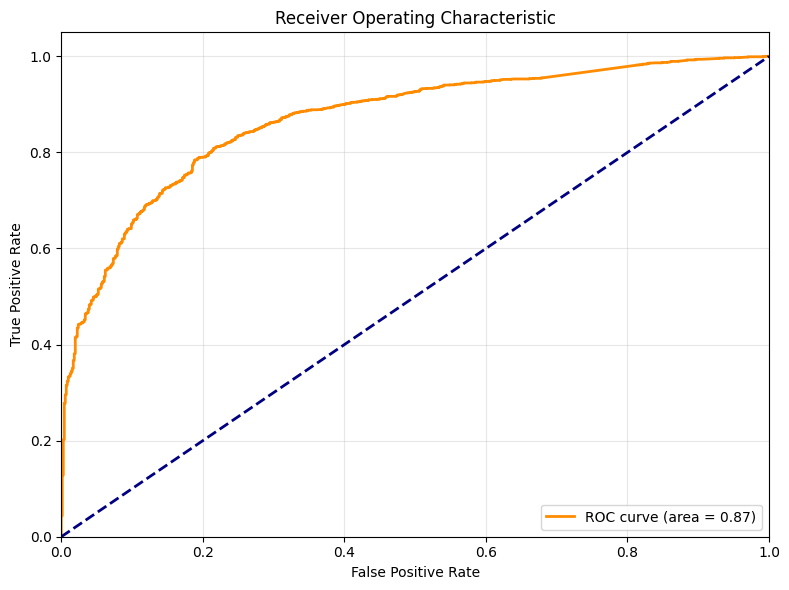

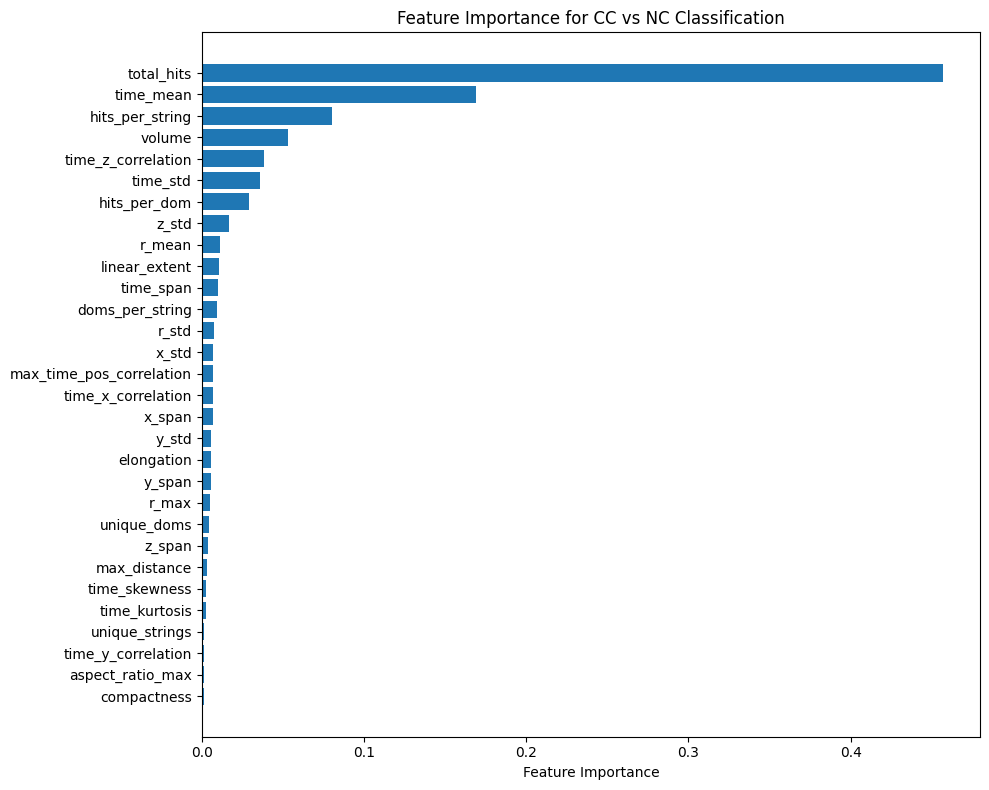


Feature Importances:
total_hits: 0.4569
unique_doms: 0.0045
hits_per_dom: 0.0291
max_distance: 0.0033
time_span: 0.0100
time_mean: 0.1692
time_std: 0.0362
time_kurtosis: 0.0026
time_skewness: 0.0029
x_span: 0.0067
y_span: 0.0055
z_span: 0.0038
x_std: 0.0072
y_std: 0.0057
z_std: 0.0165
elongation: 0.0057
aspect_ratio_max: 0.0014
volume: 0.0529
linear_extent: 0.0108
compactness: 0.0012
r_mean: 0.0110
r_std: 0.0075
r_max: 0.0049
unique_strings: 0.0016
hits_per_string: 0.0803
doms_per_string: 0.0093
time_z_correlation: 0.0384
time_x_correlation: 0.0067
time_y_correlation: 0.0014
max_time_pos_correlation: 0.0067


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Prepare feature extraction - NO CHEATING VERSION
def extract_features(event_idx, data):
    """Extract features from a single event without using truth information"""
    features = {}
    
    # Get photon data for this event
    photons = data['photons'][event_idx]
    
    # Basic hit count features
    features['total_hits'] = len(photons['t'])
    
    # Unique DOMs hit
    unique_doms = len(set(zip(photons['string_id'], photons['sensor_id'])))
    features['unique_doms'] = unique_doms
    
    # Ratio of hits to unique DOMs (multiple hits per DOM suggests cascade-like event)
    features['hits_per_dom'] = features['total_hits'] / max(1, unique_doms)
    
    # Maximum distance between hit DOMs
    if len(photons['sensor_pos_x']) > 1:
        positions = np.vstack((photons['sensor_pos_x'], 
                             photons['sensor_pos_y'], 
                             photons['sensor_pos_z'])).T
        max_distance = np.max(pdist(positions))
    else:
        max_distance = 0
    features['max_distance'] = max_distance
    
    # Time-related features
    if len(photons['t']) > 0:
        times = photons['t']
        features['time_span'] = np.max(times) - np.min(times)
        features['time_mean'] = np.mean(times)
        features['time_std'] = np.std(times)
        
        # Time distribution metrics (can help identify track-like vs cascade-like patterns)
        if len(times) > 5:  # Only if we have enough hits
            features['time_kurtosis'] = ((times - np.mean(times))**4).mean() / ((times - np.mean(times))**2).mean()**2
            features['time_skewness'] = ((times - np.mean(times))**3).mean() / ((times - np.mean(times))**2).mean()**1.5
        else:
            features['time_kurtosis'] = 0
            features['time_skewness'] = 0
    else:
        features['time_span'] = 0
        features['time_mean'] = 0
        features['time_std'] = 0
        features['time_kurtosis'] = 0
        features['time_skewness'] = 0
    
    # Spatial distribution features
    if len(photons['sensor_pos_x']) > 1:
        # Basic spatial extents
        features['x_span'] = np.max(photons['sensor_pos_x']) - np.min(photons['sensor_pos_x'])
        features['y_span'] = np.max(photons['sensor_pos_y']) - np.min(photons['sensor_pos_y'])
        features['z_span'] = np.max(photons['sensor_pos_z']) - np.min(photons['sensor_pos_z'])
        features['x_std'] = np.std(photons['sensor_pos_x'])
        features['y_std'] = np.std(photons['sensor_pos_y'])
        features['z_std'] = np.std(photons['sensor_pos_z'])
        
        # Track-like metrics: elongation measures
        spatial_std = np.array([features['x_std'], features['y_std'], features['z_std']])
        features['elongation'] = np.max(spatial_std) / (np.mean(spatial_std) + 1e-10)
        
        # Aspect ratios
        span_array = np.array([features['x_span'], features['y_span'], features['z_span']])
        features['aspect_ratio_max'] = np.max(span_array) / (np.min(span_array) + 1e-10)
        
        # Volume vs Linear spread
        features['volume'] = features['x_span'] * features['y_span'] * features['z_span']
        features['linear_extent'] = np.sqrt(features['x_span']**2 + features['y_span']**2 + features['z_span']**2)
        features['compactness'] = features['volume'] / (features['linear_extent']**3 + 1e-10)
        
        # Spatial dispersion metrics 
        center_x = np.mean(photons['sensor_pos_x'])
        center_y = np.mean(photons['sensor_pos_y'])
        center_z = np.mean(photons['sensor_pos_z'])
        
        r_squared = (photons['sensor_pos_x'] - center_x)**2 + \
                    (photons['sensor_pos_y'] - center_y)**2 + \
                    (photons['sensor_pos_z'] - center_z)**2
        
        features['r_mean'] = np.mean(np.sqrt(r_squared))
        features['r_std'] = np.std(np.sqrt(r_squared))
        features['r_max'] = np.max(np.sqrt(r_squared))
        
        # Topology features (string patterns)
        unique_strings = len(np.unique(photons['string_id']))
        features['unique_strings'] = unique_strings
        features['hits_per_string'] = features['total_hits'] / max(1, unique_strings)
        features['doms_per_string'] = unique_doms / max(1, unique_strings)
    else:
        # Fill in defaults if only one hit
        features['x_span'] = 0
        features['y_span'] = 0
        features['z_span'] = 0
        features['x_std'] = 0
        features['y_std'] = 0
        features['z_std'] = 0
        features['elongation'] = 0
        features['aspect_ratio_max'] = 0
        features['volume'] = 0
        features['linear_extent'] = 0
        features['compactness'] = 0
        features['r_mean'] = 0
        features['r_std'] = 0
        features['r_max'] = 0
        features['unique_strings'] = 0
        features['hits_per_string'] = 0
        features['doms_per_string'] = 0
    
    # Advanced timing-space correlations
    if len(photons['t']) > 5:
        # Try to detect if there's a coherent track-like motion
        # Simplified track fit: look for correlation between z position and time
        z_pos = photons['sensor_pos_z']
        t_pos = photons['t']
        
        # Normalization to avoid numerical issues
        z_norm = (z_pos - np.mean(z_pos)) / (np.std(z_pos) + 1e-10)
        t_norm = (t_pos - np.mean(t_pos)) / (np.std(t_pos) + 1e-10)
        
        # Correlation coefficient
        corr_zt = np.mean(z_norm * t_norm)
        features['time_z_correlation'] = corr_zt
        
        # Similar for x and y
        x_norm = (photons['sensor_pos_x'] - np.mean(photons['sensor_pos_x'])) / (np.std(photons['sensor_pos_x']) + 1e-10)
        y_norm = (photons['sensor_pos_y'] - np.mean(photons['sensor_pos_y'])) / (np.std(photons['sensor_pos_y']) + 1e-10)
        
        features['time_x_correlation'] = np.mean(x_norm * t_norm)
        features['time_y_correlation'] = np.mean(y_norm * t_norm)
        
        # Maximum absolute correlation (could be in any direction)
        features['max_time_pos_correlation'] = max(
            abs(features['time_x_correlation']),
            abs(features['time_y_correlation']),
            abs(features['time_z_correlation'])
        )
    else:
        features['time_z_correlation'] = 0
        features['time_x_correlation'] = 0
        features['time_y_correlation'] = 0
        features['max_time_pos_correlation'] = 0
        
    return features

# Extract features for all events
print("Extracting features...")
all_features = []
all_labels = []  # 1 for CC, 0 for NC

# Process CC events
for event_idx in cc_idx:
    features = extract_features(event_idx, tenk_no_agg_deepcore)
    all_features.append(list(features.values()))
    all_labels.append(1)  # CC event

# Process NC events
for event_idx in nc_idx:
    features = extract_features(event_idx, tenk_no_agg_deepcore)
    all_features.append(list(features.values()))
    all_labels.append(0)  # NC event

# Convert to numpy arrays
X = np.array(all_features)
y = np.array(all_labels)

# Get feature names for later use
feature_names = list(features.keys())

# Print dataset info
print(f"Feature matrix shape: {X.shape}")
print(f"Label vector shape: {y.shape}")
print(f"Number of CC events: {np.sum(y == 1)}")
print(f"Number of NC events: {np.sum(y == 0)}")

# Check for NaN values
if np.isnan(X).any():
    print("Warning: NaN values detected in features! Replacing with zeros.")
    X = np.nan_to_num(X)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the BDT classifier
print("Training BDT classifier...")
bdt = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    random_state=42
)

bdt.fit(X_train, y_train)

# Make predictions
y_pred = bdt.predict(X_test)
y_pred_proba = bdt.predict_proba(X_test)[:, 1]  # Probability of being CC (class 1)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['NC', 'CC'], yticklabels=['NC', 'CC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['NC', 'CC']))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.show()

# Feature Importance
feature_importance = bdt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for CC vs NC Classification')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# Print feature importances
print("\nFeature Importances:")
for i, importance in enumerate(feature_importance):
    print(f"{feature_names[i]}: {importance:.4f}")

Extracting features...
Feature matrix shape: (10000, 30)
Label vector shape: (10000,)
Number of CC events: 7601
Number of NC events: 2399
Training BDT classifier...

Model Evaluation:
Accuracy: 0.8263

Classification Report:
              precision    recall  f1-score   support

          NC       0.66      0.55      0.60       707
          CC       0.87      0.91      0.89      2293

    accuracy                           0.83      3000
   macro avg       0.76      0.73      0.74      3000
weighted avg       0.82      0.83      0.82      3000



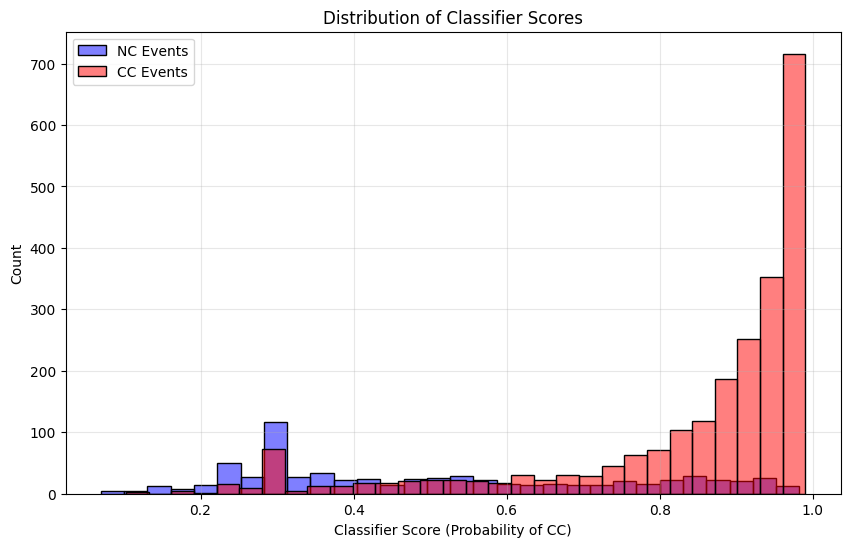


Optimal classification threshold: 0.7891
At this threshold - TPR: 0.7841, FPR: 0.1881


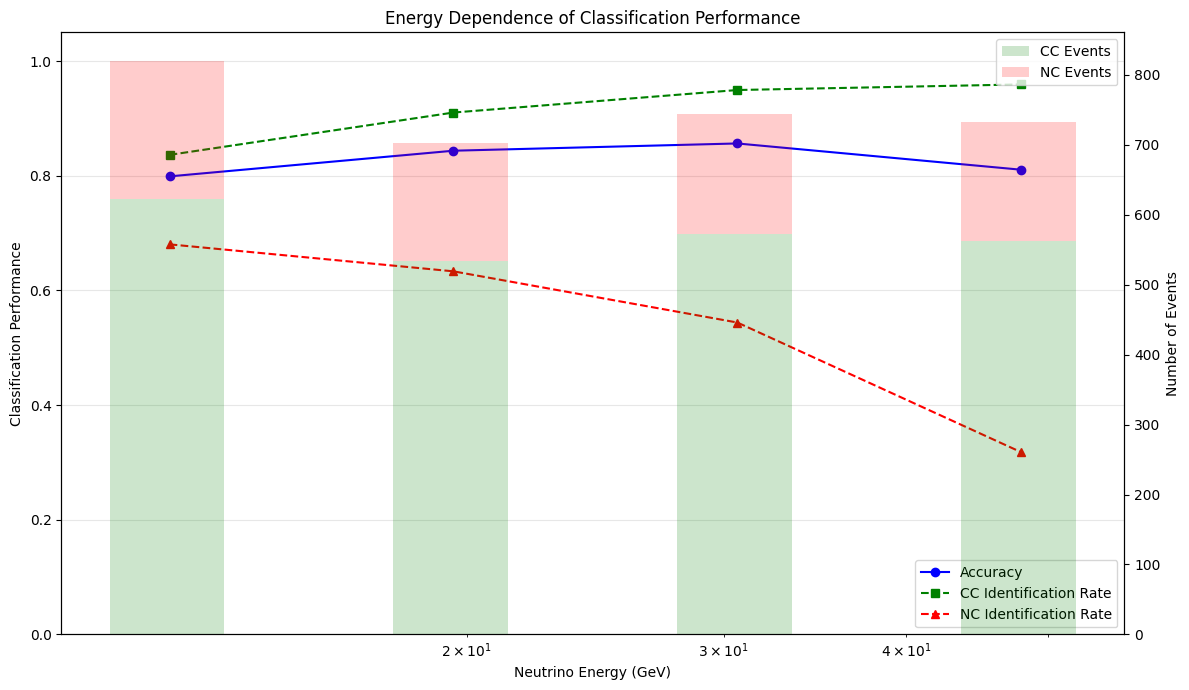

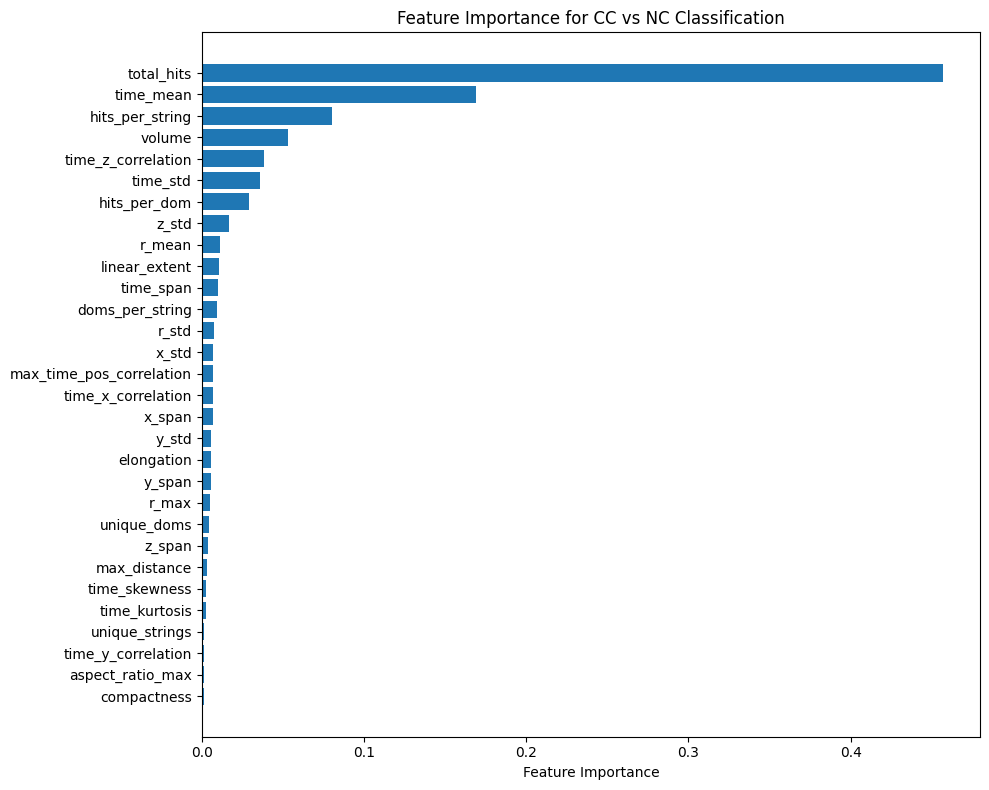

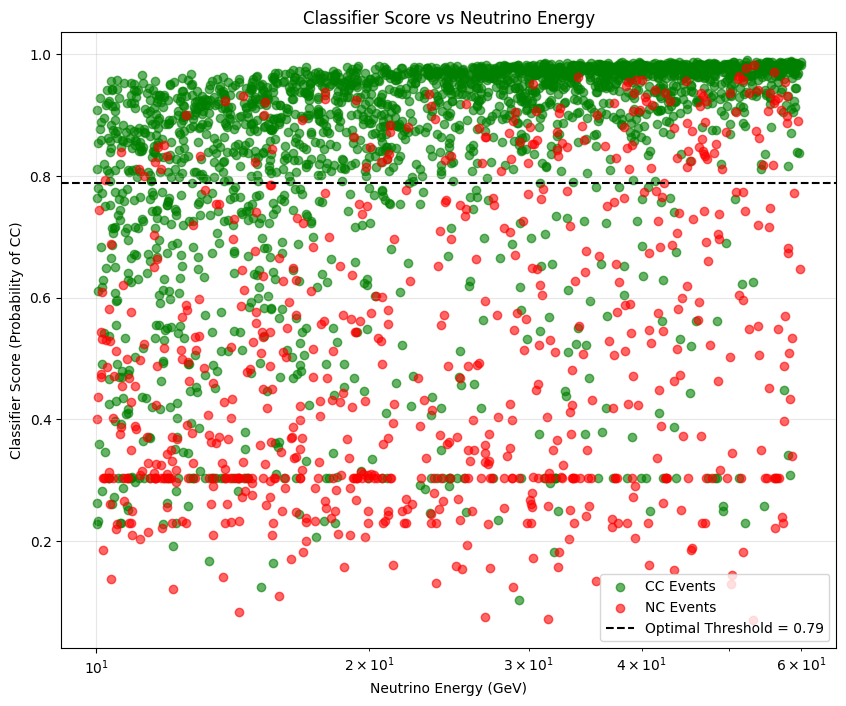

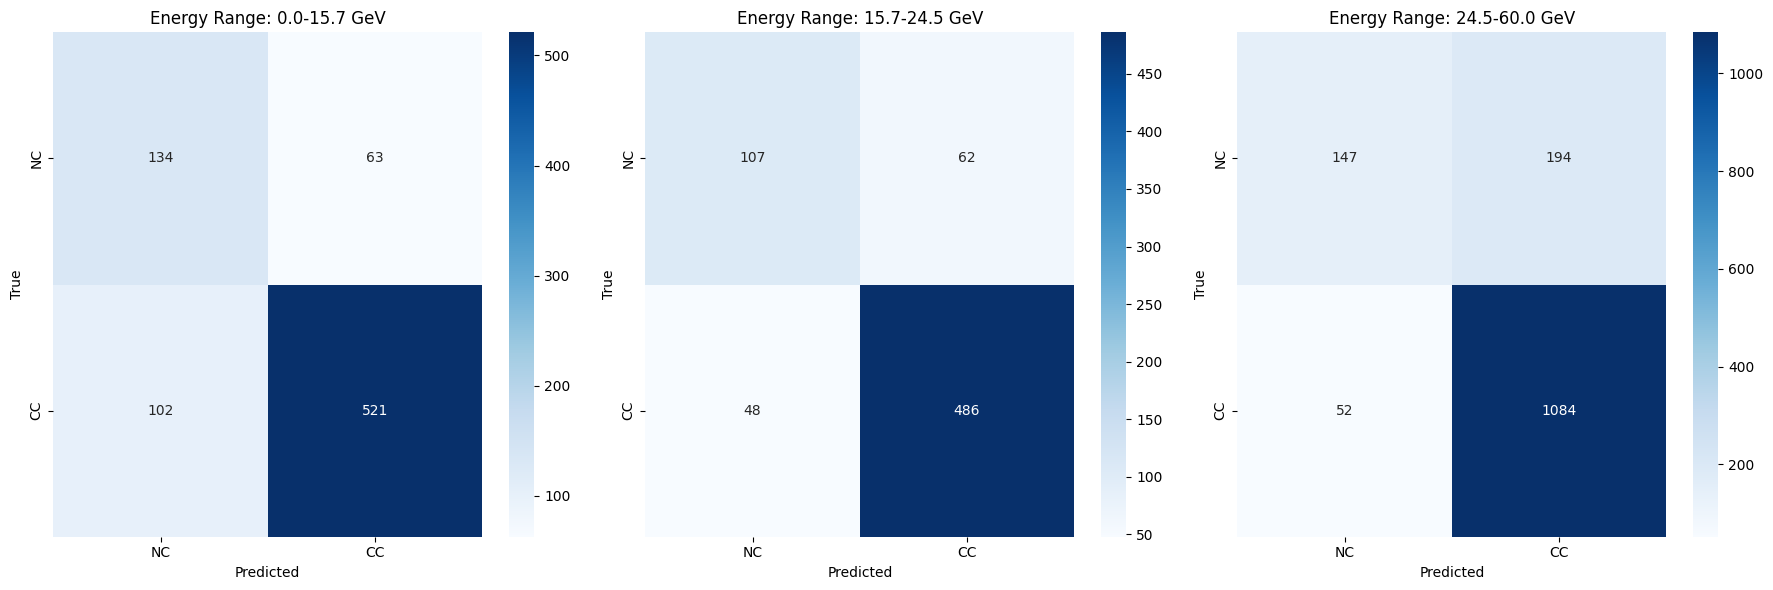

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Feature extraction function remains the same as in the previous code
# [Insert the extract_features function from the previous reply]

# Extract features for all events
print("Extracting features...")
all_features = []
all_labels = []
all_energies = []  # Store energy for energy dependence analysis

# Process CC events
for event_idx in cc_idx:
    features = extract_features(event_idx, tenk_no_agg_deepcore)
    all_features.append(list(features.values()))
    all_labels.append(1)  # CC event
    
    # Get primary neutrino energy
    energy = tenk_no_agg_deepcore['mc_truth'][event_idx]['initial_state_energy']
    all_energies.append(energy)

# Process NC events
for event_idx in nc_idx:
    features = extract_features(event_idx, tenk_no_agg_deepcore)
    all_features.append(list(features.values()))
    all_labels.append(0)  # NC event
    
    # Get primary neutrino energy
    energy = tenk_no_agg_deepcore['mc_truth'][event_idx]['initial_state_energy']
    all_energies.append(energy)

# Convert to numpy arrays
X = np.array(all_features)
y = np.array(all_labels)
energies = np.array(all_energies)

# Get feature names for later use
feature_names = list(features.keys())

# Print dataset info
print(f"Feature matrix shape: {X.shape}")
print(f"Label vector shape: {y.shape}")
print(f"Number of CC events: {np.sum(y == 1)}")
print(f"Number of NC events: {np.sum(y == 0)}")

# Check for NaN values
if np.isnan(X).any():
    print("Warning: NaN values detected in features! Replacing with zeros.")
    X = np.nan_to_num(X)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets - keep track of energies too
X_train, X_test, y_train, y_test, energy_train, energy_test = train_test_split(
    X_scaled, y, energies, test_size=0.3, random_state=42)

# Initialize and train the BDT classifier
print("Training BDT classifier...")
bdt = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    random_state=42
)

bdt.fit(X_train, y_train)

# Make predictions
y_pred = bdt.predict(X_test)
y_score = bdt.predict_proba(X_test)[:, 1]  # Probability of being CC (class 1)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['NC', 'CC']))

# PART 1: LOGIT SCORE ANALYSIS
# ============================

# Plotting the distribution of classifier scores for both classes
plt.figure(figsize=(10, 6))
sns.histplot(y_score[y_test == 0], bins=30, alpha=0.5, label='NC Events', color='blue')
sns.histplot(y_score[y_test == 1], bins=30, alpha=0.5, label='CC Events', color='red')
plt.xlabel('Classifier Score (Probability of CC)')
plt.ylabel('Count')
plt.title('Distribution of Classifier Scores')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('classifier_score_distribution.png')
plt.show()

# Find optimal threshold - J statistic (Youden's J = TPR - FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal classification threshold: {optimal_threshold:.4f}")
print(f"At this threshold - TPR: {tpr[optimal_idx]:.4f}, FPR: {fpr[optimal_idx]:.4f}")

# PART 2: ENERGY DEPENDENCE ANALYSIS
# ==================================

# Create energy bins
energy_min = np.min(energy_test)
energy_max = np.max(energy_test)
energy_bins = np.logspace(np.log10(max(1, energy_min)), np.log10(energy_max), 5)

# Initialize arrays for energy-dependent metrics
bin_accuracies = []
bin_centers = []
bin_cc_counts = []
bin_nc_counts = []
bin_tpr = []  # True positive rate (CC identification)
bin_tnr = []  # True negative rate (NC identification)

# For each energy bin, compute classification metrics
for i in range(len(energy_bins)-1):
    # Find events in this energy bin
    mask = (energy_test >= energy_bins[i]) & (energy_test < energy_bins[i+1])
    
    if np.sum(mask) < 5:  # Skip if too few events
        continue
    
    # Calculate metrics for this bin
    bin_accuracy = accuracy_score(y_test[mask], y_pred[mask])
    bin_accuracies.append(bin_accuracy)
    bin_centers.append(np.sqrt(energy_bins[i] * energy_bins[i+1]))
    
    # Count CC and NC events in this bin
    bin_cc_count = np.sum(y_test[mask] == 1)
    bin_nc_count = np.sum(y_test[mask] == 0)
    bin_cc_counts.append(bin_cc_count)
    bin_nc_counts.append(bin_nc_count)
    
    # TPR and TNR for this bin
    if bin_cc_count > 0:
        tpr_bin = np.sum((y_pred[mask] == 1) & (y_test[mask] == 1)) / bin_cc_count
        bin_tpr.append(tpr_bin)
    else:
        bin_tpr.append(0)
        
    if bin_nc_count > 0:
        tnr_bin = np.sum((y_pred[mask] == 0) & (y_test[mask] == 0)) / bin_nc_count
        bin_tnr.append(tnr_bin)
    else:
        bin_tnr.append(0)

# Plot energy-dependent classification performance
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot accuracy vs energy
ax1.plot(bin_centers, bin_accuracies, 'o-', color='blue', label='Accuracy')
ax1.plot(bin_centers, bin_tpr, 's--', color='green', label='CC Identification Rate')
ax1.plot(bin_centers, bin_tnr, '^--', color='red', label='NC Identification Rate')
ax1.set_xscale('log')
ax1.set_xlabel('Neutrino Energy (GeV)')
ax1.set_ylabel('Classification Performance')
ax1.set_ylim(0, 1.05)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Add secondary y-axis for event counts
ax2 = ax1.twinx()
ax2.bar(bin_centers, bin_cc_counts, alpha=0.2, width=np.diff(energy_bins)*0.4, label='CC Events', color='green')
ax2.bar(bin_centers, bin_nc_counts, alpha=0.2, width=np.diff(energy_bins)*0.4, label='NC Events', color='red', bottom=bin_cc_counts)
ax2.set_ylabel('Number of Events')
ax2.legend(loc='upper right')

plt.title('Energy Dependence of Classification Performance')
plt.tight_layout()
plt.savefig('energy_dependence.png')
plt.show()

# PART 3: FEATURE IMPORTANCE
# =========================

# Feature Importance (same as before)
feature_importance = bdt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for CC vs NC Classification')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# PART 4: ENERGY VS CLASSIFIER SCORE SCATTER PLOT
# ==============================================

# Create scatter plot of energy vs classifier score
plt.figure(figsize=(10, 8))
cc_mask = y_test == 1
nc_mask = y_test == 0

plt.scatter(energy_test[cc_mask], y_score[cc_mask], alpha=0.6, label='CC Events', c='green')
plt.scatter(energy_test[nc_mask], y_score[nc_mask], alpha=0.6, label='NC Events', c='red')

plt.axhline(y=optimal_threshold, color='black', linestyle='--', 
           label=f'Optimal Threshold = {optimal_threshold:.2f}')

plt.xscale('log')
plt.xlabel('Neutrino Energy (GeV)')
plt.ylabel('Classifier Score (Probability of CC)')
plt.title('Classifier Score vs Neutrino Energy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('score_vs_energy.png')
plt.show()

# PART 5: CONFUSION MATRICES BY ENERGY RANGE
# =========================================

# Create confusion matrices for different energy ranges
energy_ranges = [
    (0, energy_bins[1]),  # Low energy
    (energy_bins[1], energy_bins[2]),  # Medium-low energy
    (energy_bins[2], energy_bins[-1])  # High energy
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (e_min, e_max) in enumerate(energy_ranges):
    # Filter events in this energy range
    mask = (energy_test >= e_min) & (energy_test < e_max)
    
    if np.sum(mask) < 5:  # Skip if too few events
        continue
    
    # Create confusion matrix
    cm = confusion_matrix(y_test[mask], y_pred[mask])
    
    # Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['NC', 'CC'], yticklabels=['NC', 'CC'])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
    axes[i].set_title(f'Energy Range: {e_min:.1f}-{e_max:.1f} GeV')

plt.tight_layout()
plt.savefig('confusion_matrices_by_energy.png')
plt.show()

In [5]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_curve, auc, confusion_matrix)
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pickle

# Start timing
start_time = time.time()

# # Directory containing your files
# data_dir = "output/"
# # Create a results directory for saving figures
# results_dir = os.path.join(data_dir, "dom_threshold_comparison")
# os.makedirs(results_dir, exist_ok=True)

# List of simulation output files
sim_files = [
    "10000_events_simset_1800_seed_1000_upgrade_internal_20250516_224300.parquet",
    # "10000_events_simset_1810_seed_1010_upgrade_internal_20250516_224002.parquet",
    # "10000_events_simset_1801_seed_1001_upgrade_internal_20250516_224251.parquet",
    # "10000_events_simset_1809_seed_1009_upgrade_internal_20250516_224018.parquet",
    # "10000_events_simset_1805_seed_1005_upgrade_internal_20250516_224152.parquet",
    # "10000_events_simset_1806_seed_1006_upgrade_internal_20250516_224137.parquet",
    # "10000_events_simset_1807_seed_1007_upgrade_internal_20250516_224123.parquet",   
    # "10000_events_simset_1804_seed_1004_upgrade_internal_20250516_224203.parquet",
    # "10000_events_simset_1808_seed_1008_upgrade_internal_20250516_224038.parquet",
    # "10000_events_simset_1803_seed_1003_upgrade_internal_20250516_224216.parquet",
    # "10000_events_simset_1802_seed_1002_upgrade_internal_20250516_224236.parquet"
]

# # Configure output
# log_file = os.path.join(results_dir, "comparison_log.txt")

In [7]:
def extract_hit_features(event_data):
    """Extract features for each hit to classify as muon or hadron"""
    try:
        # Skip if not a CC event
        if event_data['mc_truth']['interaction'] != 1:
            return []
        
        # Get photon data
        photons = event_data['photons']
        
        # Skip if no hits
        if len(photons['t']) == 0:
            return []
        
        # Get final state particles
        final_state_particles = event_data['mc_truth']['final_state_type']
        
        # Map hits to particle types
        id_idx_array = photons['id_idx']
        particle_types = np.zeros_like(id_idx_array)
        for i, idx in enumerate(id_idx_array):
            if idx > 0 and idx <= len(final_state_particles):
                particle_types[i] = final_state_particles[idx-1]
        
        # Label hits: 1 for muon, 0 for hadron
        labels = (particle_types == 13).astype(int)
        
        # Position and time info
        pos_x = photons['sensor_pos_x']
        pos_y = photons['sensor_pos_y']
        pos_z = photons['sensor_pos_z']
        hit_times = photons['t']
        
        # Calculate event center and mean time
        center_x = np.mean(pos_x)
        center_y = np.mean(pos_y)
        center_z = np.mean(pos_z)
        mean_time = np.mean(hit_times)
        
        # Features for each hit
        hit_features = []
        for i in range(len(hit_times)):
            # Distance from center
            r = np.sqrt((pos_x[i] - center_x)**2 + (pos_y[i] - center_y)**2 + (pos_z[i] - center_z)**2)
            
            # Time relative to mean
            rel_time = hit_times[i] - mean_time
            
            # Feature dict for this hit
            features = {
                'time': hit_times[i],
                'rel_time': rel_time,
                'pos_x': pos_x[i],
                'pos_y': pos_y[i],
                'pos_z': pos_z[i],
                'r': r,
                'string_id': photons['string_id'][i],
                'sensor_id': photons['sensor_id'][i],
                'label': labels[i]
            }
            
            # Add event ID for tracking
            features['event_id'] = event_data.get('event_id', -1)
            features['file_source'] = event_data.get('file_source', 'unknown')
            
            hit_features.append(features)
        
        return hit_features
    except Exception as e:
        print('ahhh')
        return []


In [8]:
all_hit_features = []

# Process each file
for file_idx, sim_file in enumerate(sim_files):
    file_path = os.path.join(data_dir, sim_file)
    
    print(f"\nProcessing {sim_file} ({file_idx+1}/{len(sim_files)})...")
    
    # Load the file
    df = pd.read_parquet(file_path)
    print(f"Loaded {len(df)} events")
    
    # Add event ID and file source for tracking
    for i, row in df.iterrows():
        row['event_id'] = i
        row['file_source'] = sim_file
    
    # Extract hit features for muon vs hadron classification
    file_hit_features = []
    cc_count = 0
    
    for i, (idx, event_data) in enumerate(df.iterrows()):
        if i % 1000 == 0:  # Progress update
            print(f"  Processing event {i}/{len(df)}...")
        
        # Skip if not a CC event
        if event_data['mc_truth']['interaction'] != 1:
            continue
        
        cc_count += 1
        hit_features = extract_hit_features(event_data)
        if hit_features:
            file_hit_features.extend(hit_features)
    
    print(f"  Extracted features for {len(file_hit_features)} hits from {cc_count} CC events")
    all_hit_features.extend(file_hit_features)


Processing 10000_events_simset_1800_seed_1000_upgrade_internal_20250516_224300.parquet (1/1)...
Loaded 10000 events
  Processing event 0/10000...
  Processing event 1000/10000...
  Processing event 2000/10000...
  Processing event 3000/10000...
  Processing event 4000/10000...
  Processing event 5000/10000...
  Processing event 6000/10000...
  Processing event 7000/10000...
  Processing event 8000/10000...
  Processing event 9000/10000...
  Extracted features for 344452 hits from 7601 CC events


In [9]:

# Convert to DataFrame
hit_df = pd.DataFrame(all_hit_features)
print(f"\nTotal hits collected: {len(hit_df)}")

# Check class balance
muon_count = sum(hit_df['label'] == 1)
hadron_count = sum(hit_df['label'] == 0)
print(f"Class balance: {muon_count} muon hits ({muon_count/len(hit_df)*100:.1f}%), {hadron_count} hadron hits ({hadron_count/len(hit_df)*100:.1f}%)")

# Save hit statistics
hit_stats = {
    'total_hits': len(hit_df),
    'muon_hits': muon_count,
    'hadron_hits': hadron_count,
    'muon_percentage': muon_count/len(hit_df)*100
}
#pd.DataFrame([hit_stats]).to_csv(os.path.join(results_dir, "hit_statistics.csv"), index=False)

# Prepare features and target for BDT
X_hit = hit_df.drop(['label', 'event_id', 'file_source'], axis=1)
y_hit = hit_df['label']

# Split the data
X_hit_train, X_hit_test, y_hit_train, y_hit_test = train_test_split(X_hit, y_hit, test_size=0.3, random_state=42, stratify=y_hit)
print(f"Training set: {X_hit_train.shape[0]} hits, Test set: {X_hit_test.shape[0]} hits")



Total hits collected: 344452
Class balance: 239849 muon hits (69.6%), 104603 hadron hits (30.4%)
Training set: 241116 hits, Test set: 103336 hits


In [10]:
X_hit_train, X_hit_test, y_hit_train, y_hit_test = train_test_split(X_hit, y_hit, test_size=0.3, random_state=42, stratify=y_hit)
print(f"Training set: {X_hit_train.shape[0]} hits, Test set: {X_hit_test.shape[0]} hits")

# Scale features
hit_scaler = StandardScaler()
X_hit_train_scaled = hit_scaler.fit_transform(X_hit_train)
X_hit_test_scaled = hit_scaler.transform(X_hit_test)

# Train BDT classifier for muon vs hadron
print("\nTraining BDT classifier for muon vs hadron hits...")
hit_bdt = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

hit_bdt.fit(X_hit_train_scaled, y_hit_train)

# Make predictions
y_hit_pred = hit_bdt.predict(X_hit_test_scaled)
y_hit_prob = hit_bdt.predict_proba(X_hit_test_scaled)[:, 1]  # Probability of being a muon hit

# Evaluate model
hit_accuracy = accuracy_score(y_hit_test, y_hit_pred)
print(f"BDT Accuracy: {hit_accuracy:.4f}")

Training set: 241116 hits, Test set: 103336 hits

Training BDT classifier for muon vs hadron hits...
BDT Accuracy: 0.7390


In [13]:
tenk_no_agg_deepcore = pd.read_parquet('output/10000_events_simset_1800_seed_1000_upgrade_internal_20250516_224300.parquet')


In [14]:
# First, get CC and NC events
nc_idx = []
cc_idx = []
for i in range(10000):
    if tenk_no_agg_deepcore['mc_truth'][i]['interaction'] == 1:
        cc_idx.append(i)
    else:
        nc_idx.append(i)

# Now add a 'particle_type' field to the photons structure
for i in range(10000):
    # Get the id_idx for all photons in this event
    id_idx_array = tenk_no_agg_deepcore['photons'][i]['id_idx']
    
    # Get the final_state_type array for this event
    final_state_types = tenk_no_agg_deepcore['mc_truth'][i]['final_state_type']
    
    # Create new array to store the particle types
    # Using the id_idx (with -1 adjustment) to map to final_state_type
    particle_types = np.array([final_state_types[idx-1] for idx in id_idx_array])
    
    # Add this as a new field to the photons structure
    tenk_no_agg_deepcore['photons'][i]['particle_type'] = particle_types

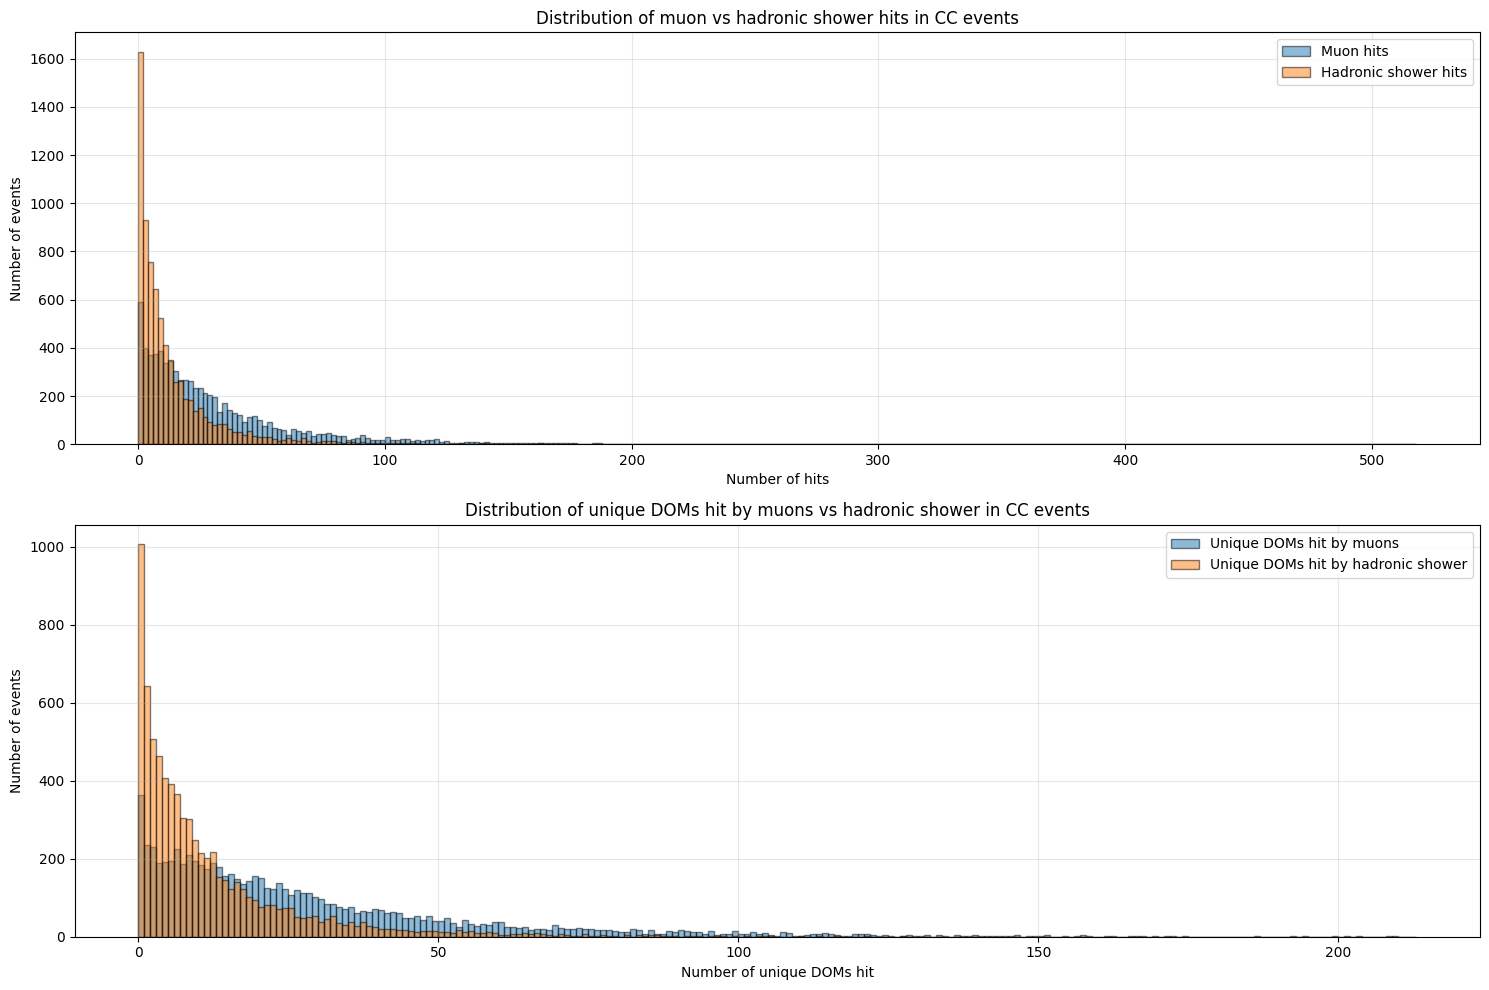

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Arrays to store hit counts
muon_hits_per_event = np.zeros(len(cc_idx))
hadron_hits_per_event = np.zeros(len(cc_idx))

# Arrays to store unique DOM hit counts
unique_muon_doms_per_event = np.zeros(len(cc_idx))
unique_hadron_doms_per_event = np.zeros(len(cc_idx))

# Process each CC event
for i, event_idx in enumerate(cc_idx):
    # Get particle types for all hits in this event
    particle_types = tenk_no_agg_deepcore['photons'][event_idx]['particle_type']
    
    # Identify muon hits and hadronic shower hits
    muon_mask = (particle_types == 13)
    hadron_mask = (particle_types != 13)
    
    # Count total hits
    muon_hits_per_event[i] = np.sum(muon_mask)
    hadron_hits_per_event[i] = np.sum(hadron_mask)
    
    # For unique DOM counts, we need string_id and sensor_id
    string_ids = tenk_no_agg_deepcore['photons'][event_idx]['string_id']
    sensor_ids = tenk_no_agg_deepcore['photons'][event_idx]['sensor_id']
    
    # Get unique DOMs hit by muons
    if np.any(muon_mask):
        muon_strings = string_ids[muon_mask]
        muon_sensors = sensor_ids[muon_mask]
        unique_muon_doms_per_event[i] = len(set(zip(muon_strings, muon_sensors)))
    
    # Get unique DOMs hit by hadronic shower
    if np.any(hadron_mask):
        hadron_strings = string_ids[hadron_mask]
        hadron_sensors = sensor_ids[hadron_mask]
        unique_hadron_doms_per_event[i] = len(set(zip(hadron_strings, hadron_sensors)))

# Create histograms
plt.figure(figsize=(15, 10))

# Plot 1: Total hits distribution
plt.subplot(2, 1, 1)
bins = np.arange(0, max(np.max(muon_hits_per_event), np.max(hadron_hits_per_event)) + 10, 2)
plt.hist(muon_hits_per_event, bins=bins, alpha=0.5, label='Muon hits', edgecolor='black')
plt.hist(hadron_hits_per_event, bins=bins, alpha=0.5, label='Hadronic shower hits', edgecolor='black')
plt.xlabel('Number of hits')
plt.ylabel('Number of events')
plt.title('Distribution of muon vs hadronic shower hits in CC events')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Unique DOMs hit distribution
plt.subplot(2, 1, 2)
bins = np.arange(0, max(np.max(unique_muon_doms_per_event), np.max(unique_hadron_doms_per_event)) + 5, 1)
plt.hist(unique_muon_doms_per_event, bins=bins, alpha=0.5, label='Unique DOMs hit by muons', edgecolor='black')
plt.hist(unique_hadron_doms_per_event, bins=bins, alpha=0.5, label='Unique DOMs hit by hadronic shower', edgecolor='black')
plt.xlabel('Number of unique DOMs hit')
plt.ylabel('Number of events')
plt.title('Distribution of unique DOMs hit by muons vs hadronic shower in CC events')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

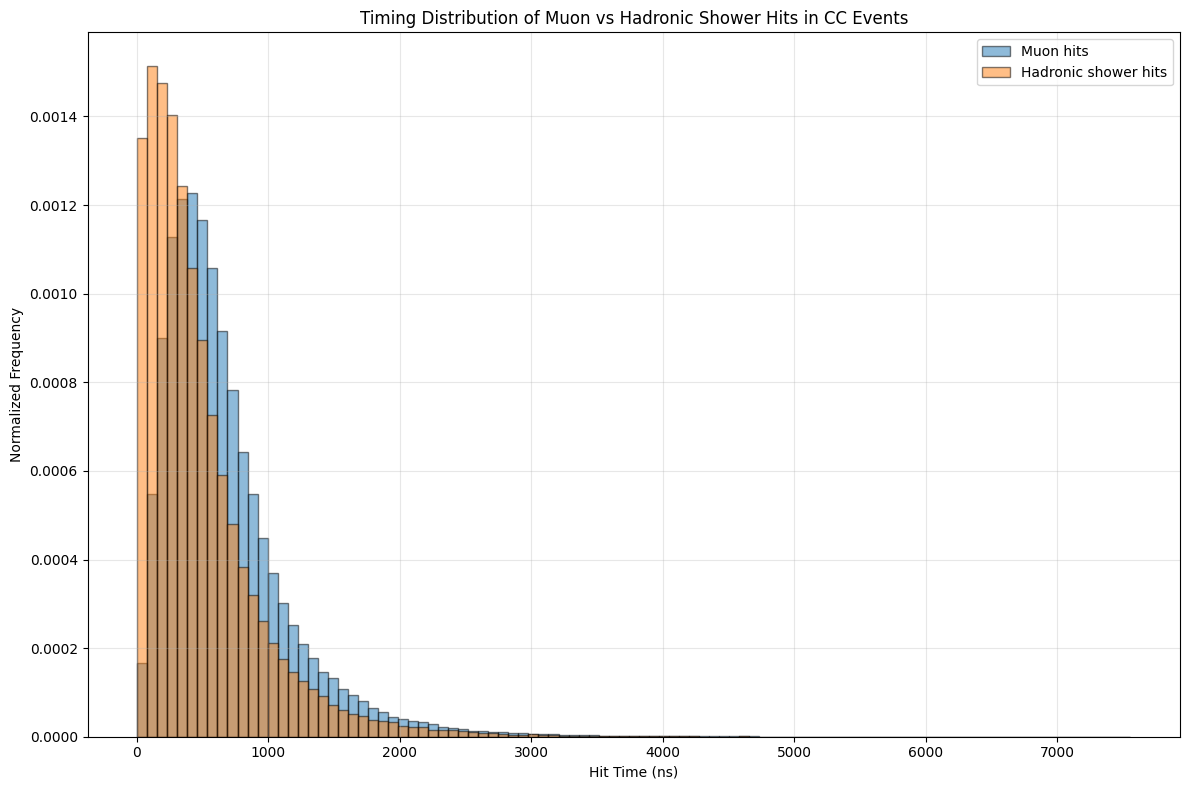

Muon hits statistics:
  Count: 239849
  Mean time: 671.22 ns
  Median time: 551.41 ns
  Min time: 3.32 ns
  Max time: 6895.47 ns

Hadronic shower hits statistics:
  Count: 104603
  Mean time: 482.73 ns
  Median time: 356.26 ns
  Min time: 3.30 ns
  Max time: 7556.97 ns


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Arrays to collect all hit times
all_muon_hit_times = []
all_hadron_hit_times = []

# Process each CC event
for event_idx in cc_idx:
    # Get particle types and times for all hits in this event
    particle_types = tenk_no_agg_deepcore['photons'][event_idx]['particle_type']
    hit_times = tenk_no_agg_deepcore['photons'][event_idx]['t']
    
    # Identify muon hits and hadronic shower hits
    muon_mask = (particle_types == 13)
    hadron_mask = (particle_types != 13)
    
    # Collect hit times
    muon_times = hit_times[muon_mask]
    hadron_times = hit_times[hadron_mask]
    
    # Append to our collection arrays
    all_muon_hit_times.extend(muon_times)
    all_hadron_hit_times.extend(hadron_times)

# Convert to numpy arrays for histogram plotting
all_muon_hit_times = np.array(all_muon_hit_times)
all_hadron_hit_times = np.array(all_hadron_hit_times)

# Create the timing histogram
plt.figure(figsize=(12, 8))

# Determine bin range covering both distributions
min_time = min(np.min(all_muon_hit_times) if len(all_muon_hit_times) > 0 else 0, 
               np.min(all_hadron_hit_times) if len(all_hadron_hit_times) > 0 else 0)
max_time = max(np.max(all_muon_hit_times) if len(all_muon_hit_times) > 0 else 3000, 
               np.max(all_hadron_hit_times) if len(all_hadron_hit_times) > 0 else 3000)

# Create logarithmically spaced bins for better visualization
# This works well for timing data that often spans multiple orders of magnitude
bins = np.linspace(min_time, max_time, 100)  # Linear bins
# Alternative: bins = np.logspace(np.log10(max(1, min_time)), np.log10(max_time), 100)  # Log bins

# Plot histograms
plt.hist(all_muon_hit_times, bins=bins, alpha=0.5, label='Muon hits', edgecolor='black', density=True)
plt.hist(all_hadron_hit_times, bins=bins, alpha=0.5, label='Hadronic shower hits', edgecolor='black', density=True)

plt.xlabel('Hit Time (ns)')
plt.ylabel('Normalized Frequency')
plt.title('Timing Distribution of Muon vs Hadronic Shower Hits in CC Events')
plt.legend()
plt.grid(alpha=0.3)

# Optional: Add a log scale on y-axis to see details in the tails
# plt.yscale('log')

plt.tight_layout()
plt.show()

# Print some statistics about the timing distributions
print(f"Muon hits statistics:")
print(f"  Count: {len(all_muon_hit_times)}")
print(f"  Mean time: {np.mean(all_muon_hit_times):.2f} ns")
print(f"  Median time: {np.median(all_muon_hit_times):.2f} ns")
print(f"  Min time: {np.min(all_muon_hit_times):.2f} ns")
print(f"  Max time: {np.max(all_muon_hit_times):.2f} ns")

print(f"\nHadronic shower hits statistics:")
print(f"  Count: {len(all_hadron_hit_times)}")
print(f"  Mean time: {np.mean(all_hadron_hit_times):.2f} ns")
print(f"  Median time: {np.median(all_hadron_hit_times):.2f} ns")
print(f"  Min time: {np.min(all_hadron_hit_times):.2f} ns")
print(f"  Max time: {np.max(all_hadron_hit_times):.2f} ns")

Extracting features...
Feature matrix shape: (10000, 30)
Label vector shape: (10000,)
Number of CC events: 7601
Number of NC events: 2399
Training BDT classifier...

Model Evaluation:
Accuracy: 0.8263


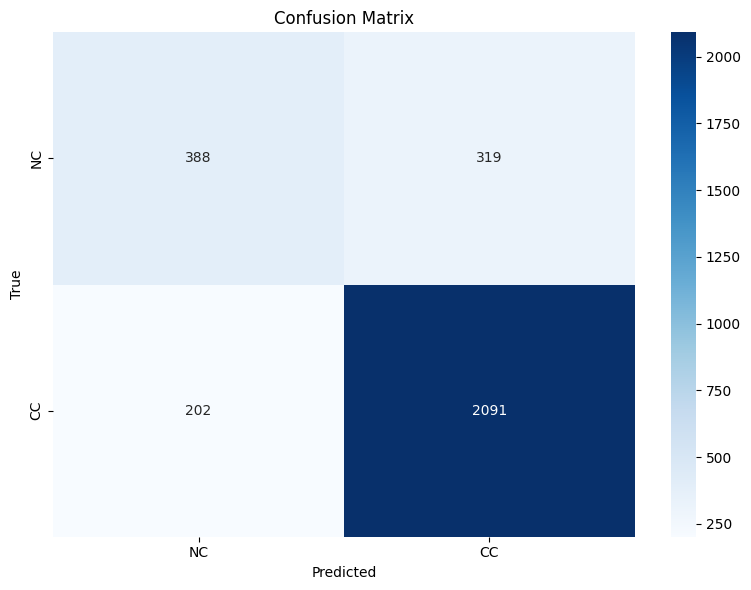


Classification Report:
              precision    recall  f1-score   support

          NC       0.66      0.55      0.60       707
          CC       0.87      0.91      0.89      2293

    accuracy                           0.83      3000
   macro avg       0.76      0.73      0.74      3000
weighted avg       0.82      0.83      0.82      3000



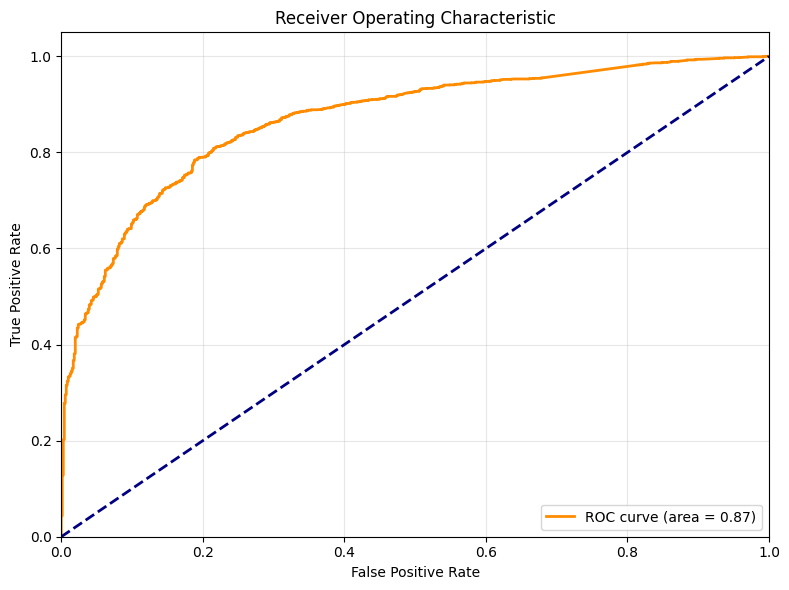

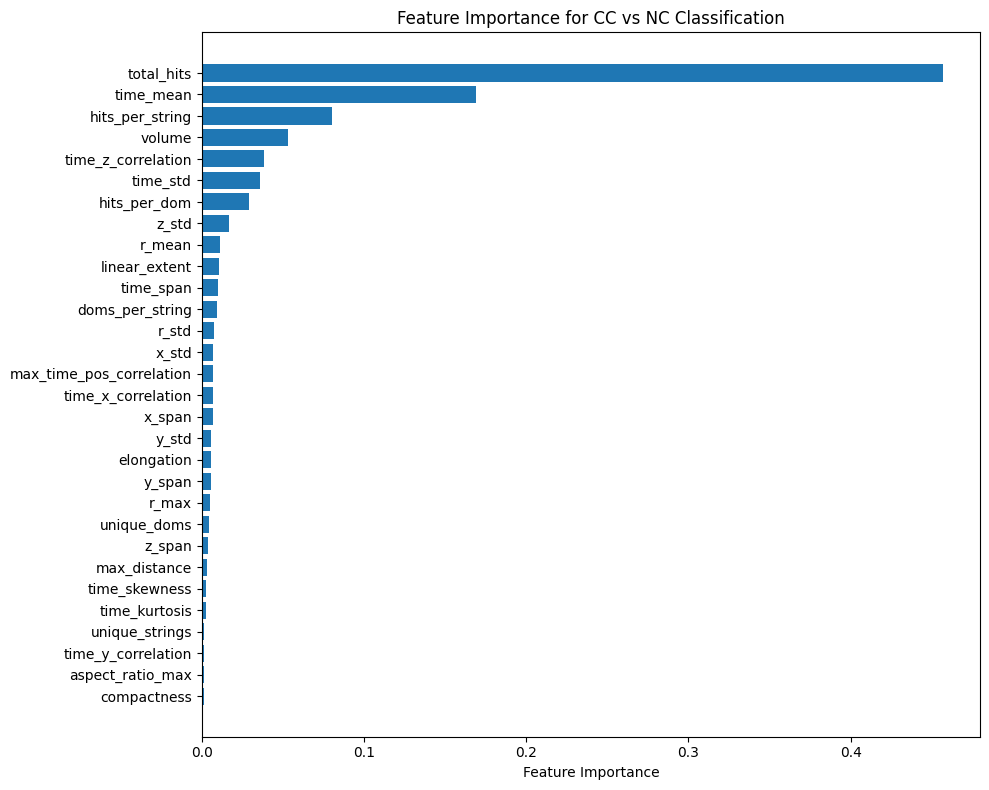


Feature Importances:
total_hits: 0.4569
unique_doms: 0.0045
hits_per_dom: 0.0291
max_distance: 0.0033
time_span: 0.0100
time_mean: 0.1692
time_std: 0.0362
time_kurtosis: 0.0026
time_skewness: 0.0029
x_span: 0.0067
y_span: 0.0055
z_span: 0.0038
x_std: 0.0072
y_std: 0.0057
z_std: 0.0165
elongation: 0.0057
aspect_ratio_max: 0.0014
volume: 0.0529
linear_extent: 0.0108
compactness: 0.0012
r_mean: 0.0110
r_std: 0.0075
r_max: 0.0049
unique_strings: 0.0016
hits_per_string: 0.0803
doms_per_string: 0.0093
time_z_correlation: 0.0384
time_x_correlation: 0.0067
time_y_correlation: 0.0014
max_time_pos_correlation: 0.0067


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Prepare feature extraction - NO CHEATING VERSION
def extract_features(event_idx, data):
    """Extract features from a single event without using truth information"""
    features = {}
    
    # Get photon data for this event
    photons = data['photons'][event_idx]
    
    # Basic hit count features
    features['total_hits'] = len(photons['t'])
    
    # Unique DOMs hit
    unique_doms = len(set(zip(photons['string_id'], photons['sensor_id'])))
    features['unique_doms'] = unique_doms
    
    # Ratio of hits to unique DOMs (multiple hits per DOM suggests cascade-like event)
    features['hits_per_dom'] = features['total_hits'] / max(1, unique_doms)
    
    # Maximum distance between hit DOMs
    if len(photons['sensor_pos_x']) > 1:
        positions = np.vstack((photons['sensor_pos_x'], 
                             photons['sensor_pos_y'], 
                             photons['sensor_pos_z'])).T
        max_distance = np.max(pdist(positions))
    else:
        max_distance = 0
    features['max_distance'] = max_distance
    
    # Time-related features
    if len(photons['t']) > 0:
        times = photons['t']
        features['time_span'] = np.max(times) - np.min(times)
        features['time_mean'] = np.mean(times)
        features['time_std'] = np.std(times)
        
        # Time distribution metrics (can help identify track-like vs cascade-like patterns)
        if len(times) > 5:  # Only if we have enough hits
            features['time_kurtosis'] = ((times - np.mean(times))**4).mean() / ((times - np.mean(times))**2).mean()**2
            features['time_skewness'] = ((times - np.mean(times))**3).mean() / ((times - np.mean(times))**2).mean()**1.5
        else:
            features['time_kurtosis'] = 0
            features['time_skewness'] = 0
    else:
        features['time_span'] = 0
        features['time_mean'] = 0
        features['time_std'] = 0
        features['time_kurtosis'] = 0
        features['time_skewness'] = 0
    
    # Spatial distribution features
    if len(photons['sensor_pos_x']) > 1:
        # Basic spatial extents
        features['x_span'] = np.max(photons['sensor_pos_x']) - np.min(photons['sensor_pos_x'])
        features['y_span'] = np.max(photons['sensor_pos_y']) - np.min(photons['sensor_pos_y'])
        features['z_span'] = np.max(photons['sensor_pos_z']) - np.min(photons['sensor_pos_z'])
        features['x_std'] = np.std(photons['sensor_pos_x'])
        features['y_std'] = np.std(photons['sensor_pos_y'])
        features['z_std'] = np.std(photons['sensor_pos_z'])
        
        # Track-like metrics: elongation measures
        spatial_std = np.array([features['x_std'], features['y_std'], features['z_std']])
        features['elongation'] = np.max(spatial_std) / (np.mean(spatial_std) + 1e-10)
        
        # Aspect ratios
        span_array = np.array([features['x_span'], features['y_span'], features['z_span']])
        features['aspect_ratio_max'] = np.max(span_array) / (np.min(span_array) + 1e-10)
        
        # Volume vs Linear spread
        features['volume'] = features['x_span'] * features['y_span'] * features['z_span']
        features['linear_extent'] = np.sqrt(features['x_span']**2 + features['y_span']**2 + features['z_span']**2)
        features['compactness'] = features['volume'] / (features['linear_extent']**3 + 1e-10)
        
        # Spatial dispersion metrics 
        center_x = np.mean(photons['sensor_pos_x'])
        center_y = np.mean(photons['sensor_pos_y'])
        center_z = np.mean(photons['sensor_pos_z'])
        
        r_squared = (photons['sensor_pos_x'] - center_x)**2 + \
                    (photons['sensor_pos_y'] - center_y)**2 + \
                    (photons['sensor_pos_z'] - center_z)**2
        
        features['r_mean'] = np.mean(np.sqrt(r_squared))
        features['r_std'] = np.std(np.sqrt(r_squared))
        features['r_max'] = np.max(np.sqrt(r_squared))
        
        # Topology features (string patterns)
        unique_strings = len(np.unique(photons['string_id']))
        features['unique_strings'] = unique_strings
        features['hits_per_string'] = features['total_hits'] / max(1, unique_strings)
        features['doms_per_string'] = unique_doms / max(1, unique_strings)
    else:
        # Fill in defaults if only one hit
        features['x_span'] = 0
        features['y_span'] = 0
        features['z_span'] = 0
        features['x_std'] = 0
        features['y_std'] = 0
        features['z_std'] = 0
        features['elongation'] = 0
        features['aspect_ratio_max'] = 0
        features['volume'] = 0
        features['linear_extent'] = 0
        features['compactness'] = 0
        features['r_mean'] = 0
        features['r_std'] = 0
        features['r_max'] = 0
        features['unique_strings'] = 0
        features['hits_per_string'] = 0
        features['doms_per_string'] = 0
    
    # Advanced timing-space correlations
    if len(photons['t']) > 5:
        # Try to detect if there's a coherent track-like motion
        # Simplified track fit: look for correlation between z position and time
        z_pos = photons['sensor_pos_z']
        t_pos = photons['t']
        
        # Normalization to avoid numerical issues
        z_norm = (z_pos - np.mean(z_pos)) / (np.std(z_pos) + 1e-10)
        t_norm = (t_pos - np.mean(t_pos)) / (np.std(t_pos) + 1e-10)
        
        # Correlation coefficient
        corr_zt = np.mean(z_norm * t_norm)
        features['time_z_correlation'] = corr_zt
        
        # Similar for x and y
        x_norm = (photons['sensor_pos_x'] - np.mean(photons['sensor_pos_x'])) / (np.std(photons['sensor_pos_x']) + 1e-10)
        y_norm = (photons['sensor_pos_y'] - np.mean(photons['sensor_pos_y'])) / (np.std(photons['sensor_pos_y']) + 1e-10)
        
        features['time_x_correlation'] = np.mean(x_norm * t_norm)
        features['time_y_correlation'] = np.mean(y_norm * t_norm)
        
        # Maximum absolute correlation (could be in any direction)
        features['max_time_pos_correlation'] = max(
            abs(features['time_x_correlation']),
            abs(features['time_y_correlation']),
            abs(features['time_z_correlation'])
        )
    else:
        features['time_z_correlation'] = 0
        features['time_x_correlation'] = 0
        features['time_y_correlation'] = 0
        features['max_time_pos_correlation'] = 0
        
    return features

# Extract features for all events
print("Extracting features...")
all_features = []
all_labels = []  # 1 for CC, 0 for NC

# Process CC events
for event_idx in cc_idx:
    features = extract_features(event_idx, tenk_no_agg_deepcore)
    all_features.append(list(features.values()))
    all_labels.append(1)  # CC event

# Process NC events
for event_idx in nc_idx:
    features = extract_features(event_idx, tenk_no_agg_deepcore)
    all_features.append(list(features.values()))
    all_labels.append(0)  # NC event

# Convert to numpy arrays
X = np.array(all_features)
y = np.array(all_labels)

# Get feature names for later use
feature_names = list(features.keys())

# Print dataset info
print(f"Feature matrix shape: {X.shape}")
print(f"Label vector shape: {y.shape}")
print(f"Number of CC events: {np.sum(y == 1)}")
print(f"Number of NC events: {np.sum(y == 0)}")

# Check for NaN values
if np.isnan(X).any():
    print("Warning: NaN values detected in features! Replacing with zeros.")
    X = np.nan_to_num(X)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the BDT classifier
print("Training BDT classifier...")
bdt = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    random_state=42
)

bdt.fit(X_train, y_train)

# Make predictions
y_pred = bdt.predict(X_test)
y_pred_proba = bdt.predict_proba(X_test)[:, 1]  # Probability of being CC (class 1)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['NC', 'CC'], yticklabels=['NC', 'CC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['NC', 'CC']))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.show()

# Feature Importance
feature_importance = bdt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for CC vs NC Classification')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# Print feature importances
print("\nFeature Importances:")
for i, importance in enumerate(feature_importance):
    print(f"{feature_names[i]}: {importance:.4f}")

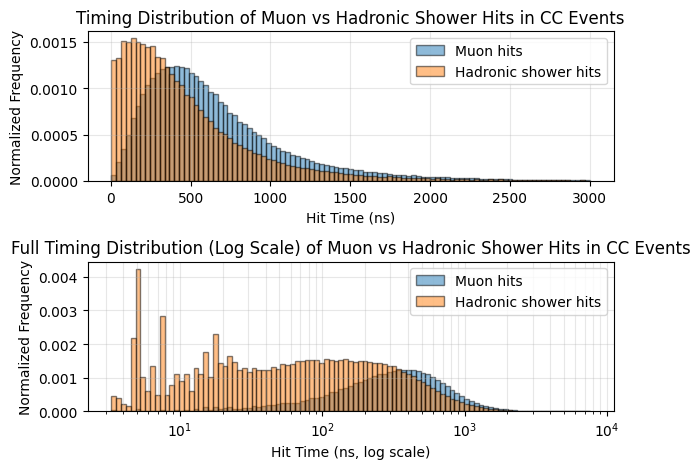


Timing Statistics:
Muon hits - Mean time: 671.22 ns, Median: 551.41 ns
Hadronic hits - Mean time: 482.73 ns, Median: 356.26 ns


In [18]:

# Plot 1: Linear time scale
plt.subplot(2, 1, 1)
# Sample if there are too many hit times to plot
if len(all_muon_hit_times) > 1000000:
    all_muon_hit_times_sample = np.random.choice(all_muon_hit_times, size=1000000, replace=False)
else:
    all_muon_hit_times_sample = all_muon_hit_times
    
if len(all_hadron_hit_times) > 1000000:
    all_hadron_hit_times_sample = np.random.choice(all_hadron_hit_times, size=1000000, replace=False)
else:
    all_hadron_hit_times_sample = all_hadron_hit_times

bins = np.linspace(min_time, min(3000, max_time), 100)  # Focus on first 3000 ns
plt.hist(all_muon_hit_times_sample, bins=bins, alpha=0.5, label='Muon hits', edgecolor='black', density=True)
plt.hist(all_hadron_hit_times_sample, bins=bins, alpha=0.5, label='Hadronic shower hits', edgecolor='black', density=True)
plt.xlabel('Hit Time (ns)')
plt.ylabel('Normalized Frequency')
plt.title('Timing Distribution of Muon vs Hadronic Shower Hits in CC Events')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Log time scale for full range
plt.subplot(2, 1, 2)
log_bins = np.logspace(np.log10(max(1, min_time)), np.log10(max_time), 100)
plt.hist(all_muon_hit_times_sample, bins=log_bins, alpha=0.5, label='Muon hits', edgecolor='black', density=True)
plt.hist(all_hadron_hit_times_sample, bins=log_bins, alpha=0.5, label='Hadronic shower hits', edgecolor='black', density=True)
plt.xscale('log')
plt.xlabel('Hit Time (ns, log scale)')
plt.ylabel('Normalized Frequency')
plt.title('Full Timing Distribution (Log Scale) of Muon vs Hadronic Shower Hits in CC Events')
plt.legend()
plt.grid(alpha=0.3, which='both')

plt.tight_layout()
plt.savefig(os.path.join(data_dir, 'muon_vs_hadron_timing_cc_events.png'), dpi=300)
plt.show()

# Print timing statistics
print("\nTiming Statistics:")
print(f"Muon hits - Mean time: {np.mean(all_muon_hit_times):.2f} ns, Median: {np.median(all_muon_hit_times):.2f} ns")
print(f"Hadronic hits - Mean time: {np.mean(all_hadron_hit_times):.2f} ns, Median: {np.median(all_hadron_hit_times):.2f} ns")

In [19]:
combined_df = pd.read_parquet('output/10000_events_simset_1800_seed_1000_upgrade_internal_20250516_224300.parquet')


In [20]:
cc_mask = []
for idx, row in combined_df.iterrows():
    cc_mask.append(row['mc_truth']['interaction'] == 1)

cc_indices = np.where(cc_mask)[0]
print(f"Found {len(cc_indices)} CC events")


Found 7601 CC events


In [21]:

# Function to process a single event and get features for each hit
def extract_hit_features(event_data):
    try:
        # Get photon data
        photons = event_data['photons']
        
        # Get hit times
        hit_times = photons['t']
        
        # Get positions
        pos_x = photons['sensor_pos_x']
        pos_y = photons['sensor_pos_y']
        pos_z = photons['sensor_pos_z']
        
        # Get string/sensor IDs
        string_ids = photons['string_id']
        sensor_ids = photons['sensor_id']
        
        # Get the id_idx array for mapping to particle types
        id_idx_array = photons['id_idx']
        
        # Get the final_state_type array from mc_truth
        final_state_types = event_data['mc_truth']['final_state_type']
        
        # Map id_idx to final_state_type to determine particle type for each hit
        # (1 for muon hits, 0 for hadronic shower hits)
        labels = []
        for idx in id_idx_array:
            if idx > 0 and idx <= len(final_state_types):
                pdg_code = final_state_types[idx-1]
                labels.append(1 if pdg_code == 13 else 0)  # 1 for muon, 0 for hadronic
            else:
                labels.append(0)  # Default to hadronic if mapping fails
        
        # Calculate additional features
        
        # 1. Time features
        # Calculate mean time of all hits in the event
        mean_time = np.mean(hit_times)
        # Time relative to mean
        rel_times = hit_times - mean_time
        
        # 2. Position features
        # Event center (weighted by hit times to capture propagation direction)
        center_x = np.mean(pos_x)
        center_y = np.mean(pos_y)
        center_z = np.mean(pos_z)
        
        # Distance from center
        r_from_center = np.sqrt((pos_x - center_x)**2 + 
                                (pos_y - center_y)**2 + 
                                (pos_z - center_z)**2)
        
        # Create feature array for each hit
        features = []
        for i in range(len(hit_times)):
            # Basic features
            hit_feature = {
                'time': hit_times[i],
                'rel_time': rel_times[i],
                'pos_x': pos_x[i],
                'pos_y': pos_y[i],
                'pos_z': pos_z[i],
                'r_from_center': r_from_center[i],
                'string_id': string_ids[i],
                'sensor_id': sensor_ids[i],
                'label': labels[i]  # 1 for muon, 0 for hadronic
            }
            features.append(hit_feature)
        
        return features
    except Exception as e:
        print(f"Error processing event: {e}")
        return []

# Collect hit features from CC events
print("Extracting hit features from CC events...")
all_hit_features = []


Extracting hit features from CC events...


In [22]:

# Limit the number of events to process to avoid memory issues
max_events_to_process = 1000
events_to_process = min(max_events_to_process, len(cc_indices))
print(f"Processing {events_to_process} out of {len(cc_indices)} CC events")

for i in range(events_to_process):
    event_idx = cc_indices[i]
    if i % 100 == 0:  # Progress update
        print(f"Processing event {i}/{events_to_process}...")
    
    # Get the current event data
    event_data = combined_df.iloc[event_idx]
    
    # Extract features for each hit
    hit_features = extract_hit_features(event_data)
    all_hit_features.extend(hit_features)

print(f"Collected features for {len(all_hit_features)} hits")

# Convert to DataFrame for easier handling
hit_df = pd.DataFrame(all_hit_features)

# Check class balance
muon_count = np.sum(hit_df['label'] == 1)
hadron_count = np.sum(hit_df['label'] == 0)
print(f"Class balance: {muon_count} muon hits ({muon_count/len(hit_df)*100:.1f}%), {hadron_count} hadronic hits ({hadron_count/len(hit_df)*100:.1f}%)")


Processing 1000 out of 7601 CC events
Processing event 0/1000...
Processing event 100/1000...
Processing event 200/1000...
Processing event 300/1000...
Processing event 400/1000...
Processing event 500/1000...
Processing event 600/1000...
Processing event 700/1000...
Processing event 800/1000...
Processing event 900/1000...


/groups/icecube/jackp/.conda/envs/myenv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/groups/icecube/jackp/.conda/envs/myenv/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Collected features for 44544 hits
Class balance: 30833 muon hits (69.2%), 13711 hadronic hits (30.8%)


Training set: 31180 hits, Test set: 13364 hits
Training BDT classifier...

Model Performance:
Accuracy: 0.7445
Precision: 0.7494
Recall: 0.9504
F1 Score: 0.8380
AUC-ROC: 0.7252

Classification Report:
              precision    recall  f1-score   support

Hadronic Hit       0.71      0.27      0.40      4073
    Muon Hit       0.75      0.95      0.84      9291

    accuracy                           0.74     13364
   macro avg       0.73      0.61      0.62     13364
weighted avg       0.74      0.74      0.70     13364



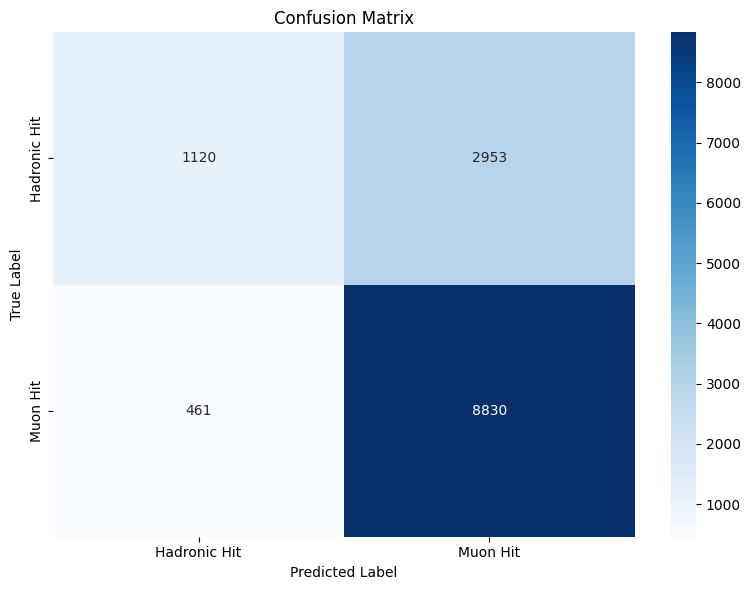

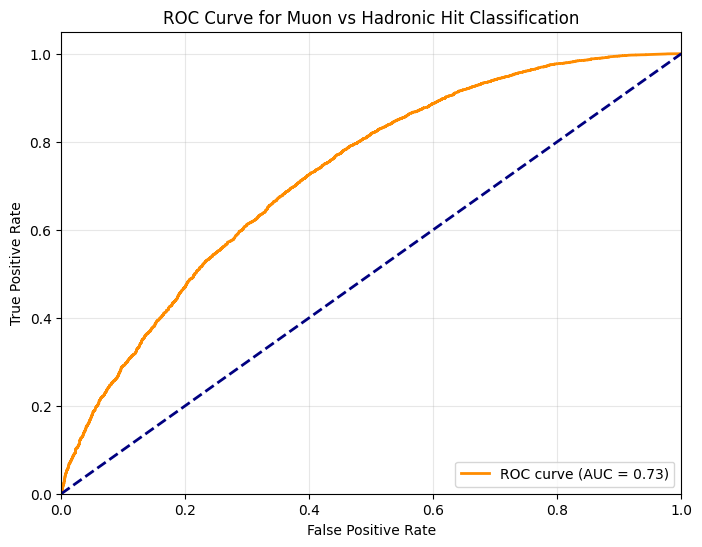

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, roc_auc_score, precision_recall_curve, auc)
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Prepare features and labels
X = hit_df[['time', 'rel_time', 'pos_x', 'pos_y', 'pos_z', 'r_from_center', 'string_id', 'sensor_id']]
y = hit_df['label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape[0]} hits, Test set: {X_test.shape[0]} hits")

# Train BDT classifier
print("Training BDT classifier...")
bdt = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

bdt.fit(X_train, y_train)

# Get predicted probabilities (logit scores)
y_prob = bdt.predict_proba(X_test)[:, 1]  # Probability of being a muon hit
y_pred = bdt.predict(X_test)

# Evaluate model
print("\nModel Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")  # How many predicted muon hits are actually muons
print(f"Recall: {recall_score(y_test, y_pred):.4f}")  # How many actual muon hits are correctly identified
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Hadronic Hit', 'Muon Hit']))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hadronic Hit', 'Muon Hit'], 
            yticklabels=['Hadronic Hit', 'Muon Hit'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig(os.path.join(data_dir, 'hit_classification_cm.png'), dpi=300)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Muon vs Hadronic Hit Classification')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig(os.path.join(data_dir, 'hit_classification_roc.png'), dpi=300)
plt.show()


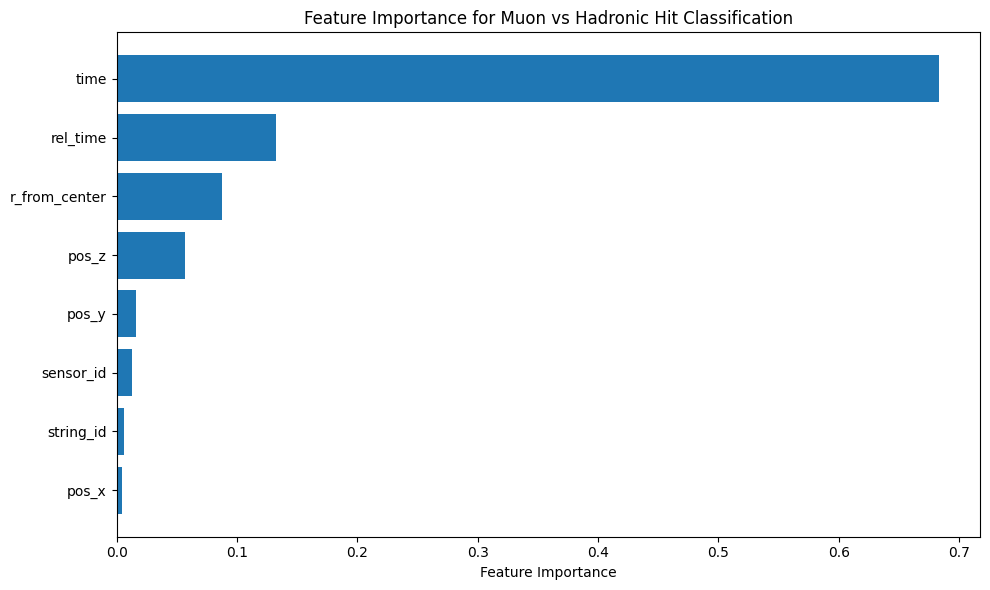

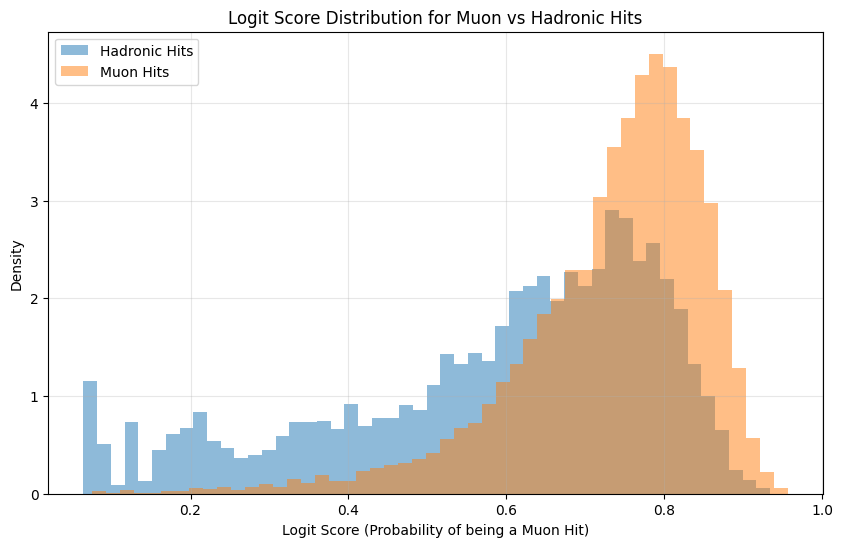


Optimal classification threshold: 0.6859
At this threshold - True Positive Rate: 0.7288, False Positive Rate: 0.4024


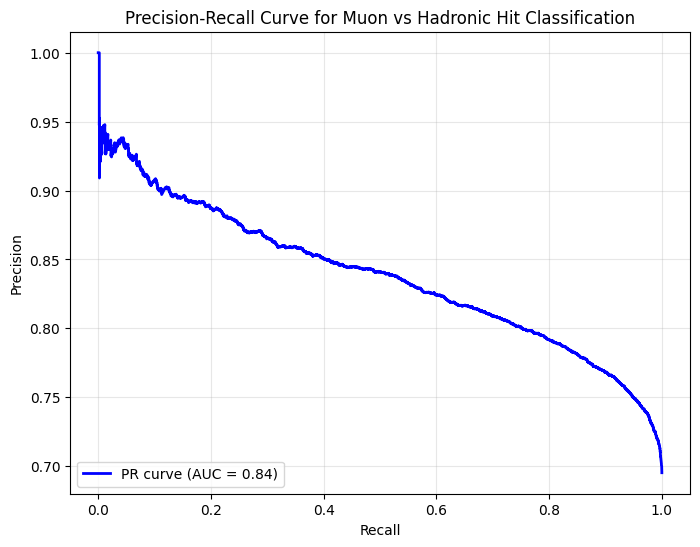


Logit Score Statistics:
Muon hits: Mean = 0.7338, Std = 0.1218
Hadronic hits: Mean = 0.5883, Std = 0.2073


In [25]:

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance = bdt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Muon vs Hadronic Hit Classification')
plt.tight_layout()
plt.savefig(os.path.join(data_dir, 'hit_classification_features.png'), dpi=300)
plt.show()

# Plot logit score distribution
plt.figure(figsize=(10, 6))
plt.hist(y_prob[y_test == 0], bins=50, alpha=0.5, label='Hadronic Hits', density=True)
plt.hist(y_prob[y_test == 1], bins=50, alpha=0.5, label='Muon Hits', density=True)
plt.xlabel('Logit Score (Probability of being a Muon Hit)')
plt.ylabel('Density')
plt.title('Logit Score Distribution for Muon vs Hadronic Hits')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig(os.path.join(data_dir, 'hit_classification_logit.png'), dpi=300)
plt.show()

# Find optimal threshold using Youden's J statistic (maximizing TPR - FPR)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal classification threshold: {optimal_threshold:.4f}")
print(f"At this threshold - True Positive Rate: {tpr[optimal_idx]:.4f}, False Positive Rate: {fpr[optimal_idx]:.4f}")

# Precision-Recall curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Muon vs Hadronic Hit Classification')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.savefig(os.path.join(data_dir, 'hit_classification_pr.png'), dpi=300)
plt.show()

# Calculate logit score statistics for each class
muon_logit_mean = np.mean(y_prob[y_test == 1])
muon_logit_std = np.std(y_prob[y_test == 1])
hadron_logit_mean = np.mean(y_prob[y_test == 0])
hadron_logit_std = np.std(y_prob[y_test == 0])

print("\nLogit Score Statistics:")
print(f"Muon hits: Mean = {muon_logit_mean:.4f}, Std = {muon_logit_std:.4f}")
print(f"Hadronic hits: Mean = {hadron_logit_mean:.4f}, Std = {hadron_logit_std:.4f}")